# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results_l2/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results_l2/1034094674_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l2/1733022752_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l2/1632670136_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l2/1338905451_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l2/247162961_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l2/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results_l2/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results_l2/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results_l2/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results_l2/trace.4.json


In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results_l2/1034094674_attl0_pol_graph.json
Edge map is:
0:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated)]
1:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated)]
2:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, terminated)]
3:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
4:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated)]
5:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated)]
6:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, terminated)]
7:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
8:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
9:[(AccessPerm, auth), (HostObs, none), (ActionResult

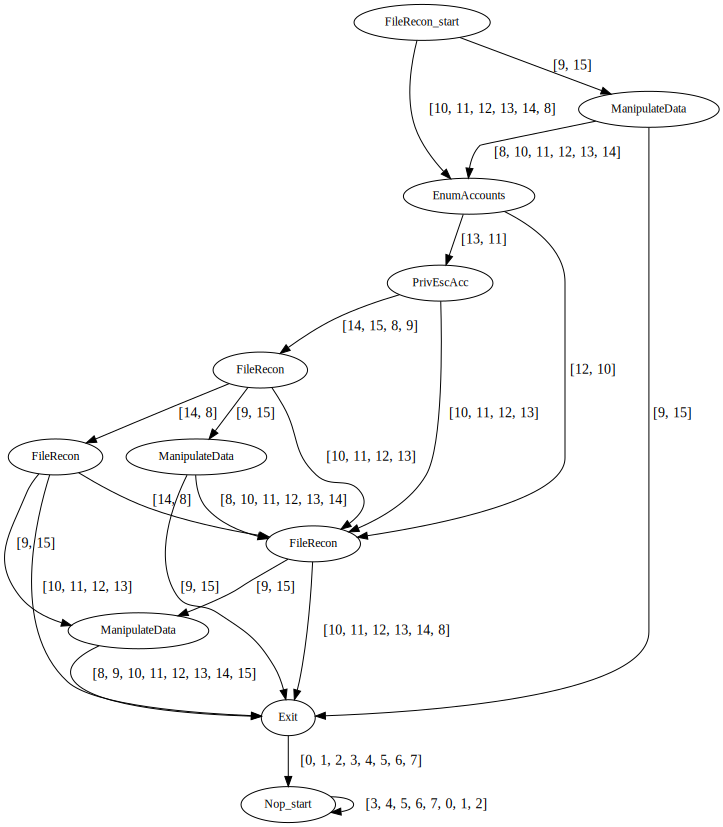

Displaying /home/ashinde/PhD/CaffineBravery/results_l2/1733022752_attl0_pol_graph.json
Edge map is:
0:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated)]
1:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated)]
2:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, terminated)]
3:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
4:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated)]
5:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated)]
6:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, terminated)]
7:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
8:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
9:[(AccessPerm, auth), (HostObs, none), (ActionResult

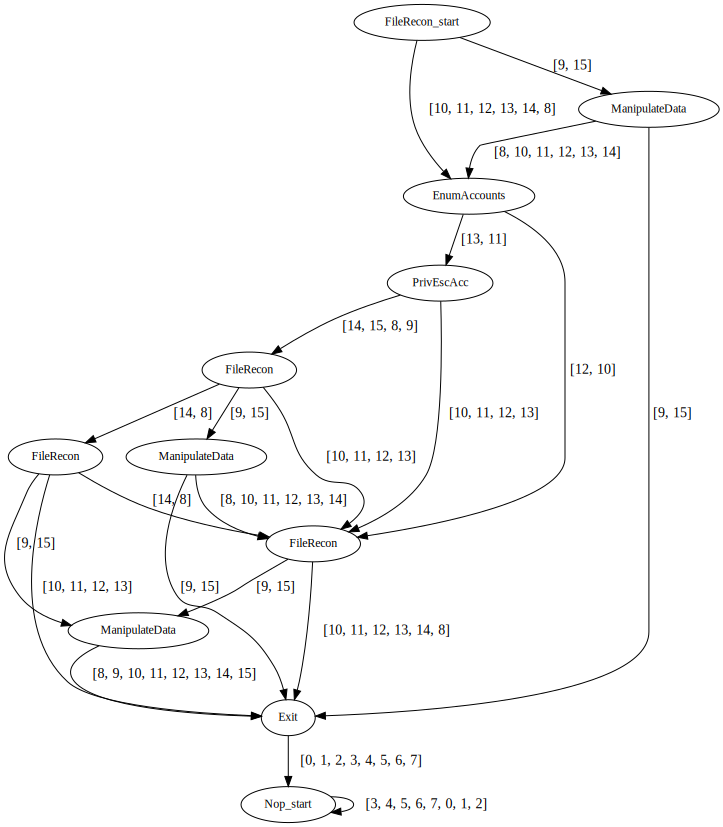

Displaying /home/ashinde/PhD/CaffineBravery/results_l2/1632670136_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


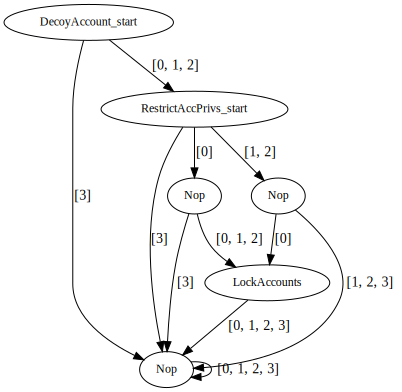

Displaying /home/ashinde/PhD/CaffineBravery/results_l2/1338905451_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


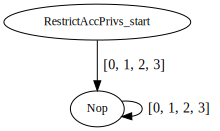

Displaying /home/ashinde/PhD/CaffineBravery/results_l2/247162961_attl2_pol_graph.json
Edge map is:
0:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active), (DefenseObs, perms_change)]
1:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active), (DefenseObs, acc_policy_change)]
2:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active), (DefenseObs, none)]
3:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, active), (DefenseObs, acc_policy_change)]
4:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, active), (DefenseObs, perms_change)]
5:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, active), (DefenseObs, none)]
6:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, active), (DefenseObs, none)]
7:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, ac

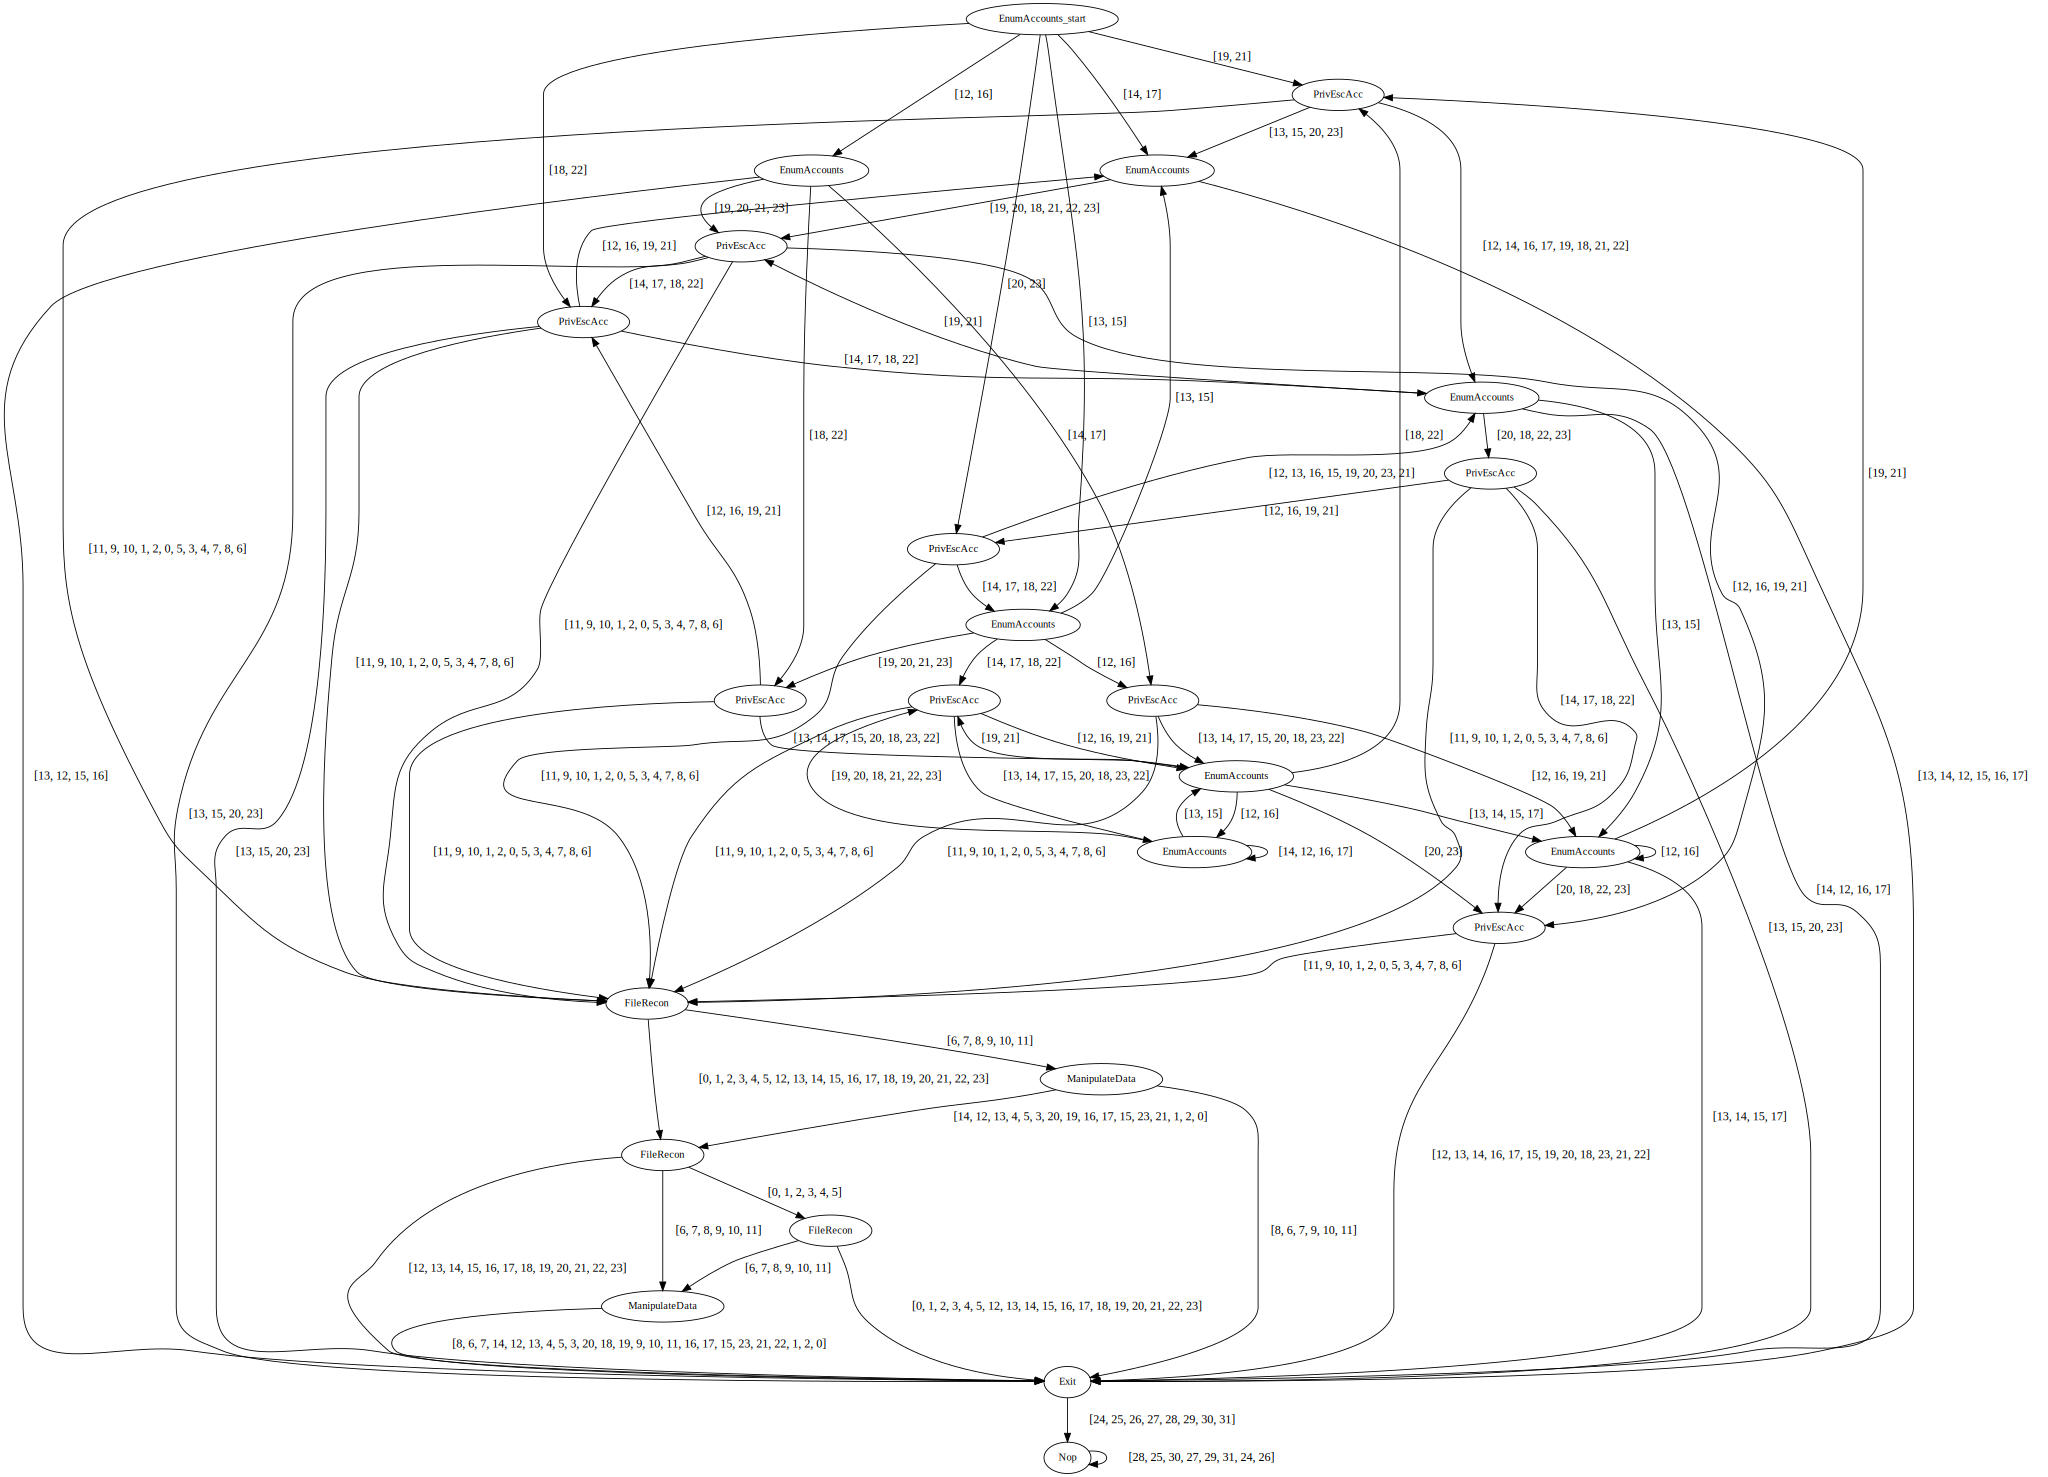

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results_l2/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l2/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l2/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l2/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l2/trace.4.json


+++++++++++++++++++ Begin Interaction +++++++++++++++++++


,agent_i.thetaj.DefFrame.highCap,agent_i.thetaj.DefFrame.lowCap,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.500000,0.500000,denied,user_files,failure,active,perms_change
1,0.345455,0.654545,denied,none,failure,active,none
2,0.333951,0.666049,denied,user_files,success,terminated,none
3,0.333951,0.666049,auth,none,success,terminated,none
4,0.333951,0.666049,denied,user_files,failure,terminated,none
5,0.333951,0.666049,denied,user_files,success,terminated,none
6,0.333951,0.666049,denied,user_files,success,terminated,none
7,0.333951,0.666049,denied,user_files,failure,terminated,none
8,0.333951,0.666049,auth,user_files,success,terminated,none
9,0.333951,0.666049,denied,user_files,failure,terminated,none


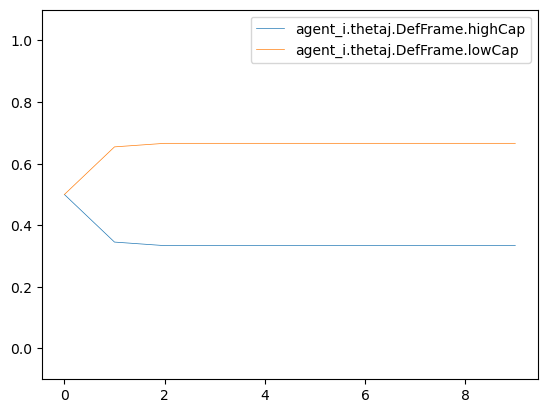

,agent_j.thetaj.AttackerFrame.att,agent_j.observation.EndPtAlerts'
0,1.0,none
1,1.0,file_write
2,1.0,none
3,1.0,none
4,1.0,none
5,1.0,file_write
6,1.0,none
7,1.0,none
8,1.0,none
9,1.0,none


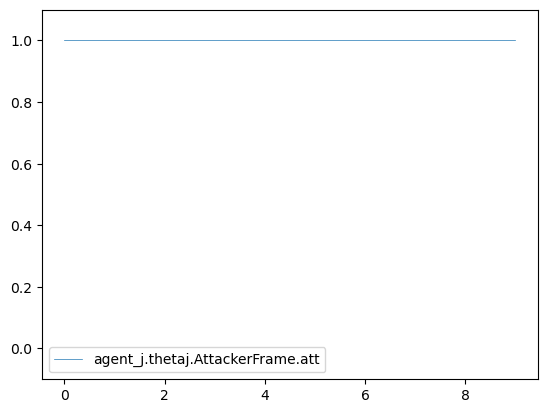

=============HostHasData============


,state.HostHasData.no,state.HostHasData.yes,agent_i.action,agent_j.action
0,0.0,1.0,EnumAccounts,RestrictAccPrivs
1,0.0,1.0,EnumAccounts,Nop
2,0.0,1.0,Exit,Nop
3,0.0,1.0,Nop,Nop
4,0.0,1.0,Nop,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


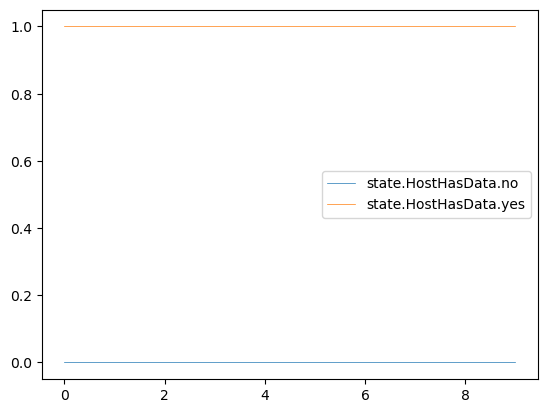

,agent_i.HostHasData.no,agent_i.HostHasData.yes,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.5,0.5,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,perms_change
1,0.5,0.5,EnumAccounts,Nop,denied,none,failure,active,none
2,0.5,0.5,Exit,Nop,denied,user_files,success,terminated,none
3,0.5,0.5,Nop,Nop,auth,none,success,terminated,none
4,0.5,0.5,Nop,Nop,denied,user_files,failure,terminated,none
5,0.5,0.5,Nop,Nop,denied,user_files,success,terminated,none
6,0.5,0.5,Nop,Nop,denied,user_files,success,terminated,none
7,0.5,0.5,Nop,Nop,denied,user_files,failure,terminated,none
8,0.5,0.5,Nop,Nop,auth,user_files,success,terminated,none
9,0.5,0.5,Nop,Nop,denied,user_files,failure,terminated,none


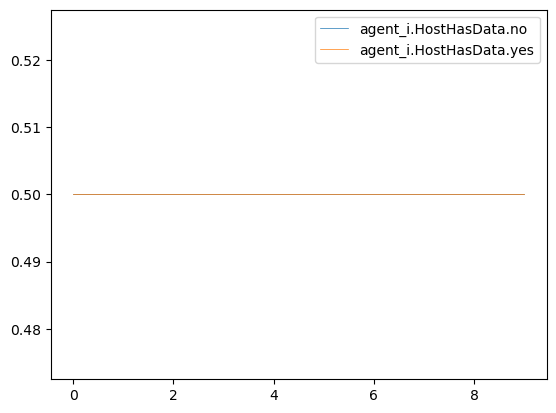

,agent_j.HostHasData.no,agent_j.HostHasData.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,1.0,RestrictAccPrivs,EnumAccounts,none
1,0.0,1.0,Nop,EnumAccounts,file_write
2,0.0,1.0,Nop,Exit,none
3,0.0,1.0,Nop,Nop,none
4,0.0,1.0,Nop,Nop,none
5,0.0,1.0,Nop,Nop,file_write
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,none


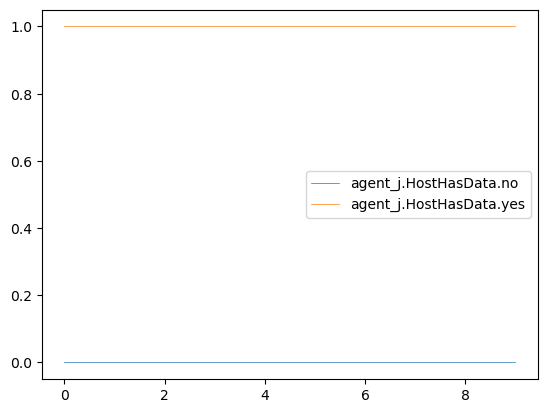

=============DataPrivs============


,state.DataPrivs.root,state.DataPrivs.user,agent_i.action,agent_j.action
0,1.0,0.0,EnumAccounts,RestrictAccPrivs
1,1.0,0.0,EnumAccounts,Nop
2,1.0,0.0,Exit,Nop
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


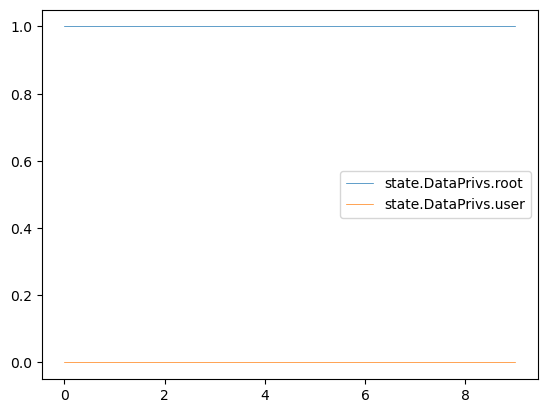

,agent_i.DataPrivs.root,agent_i.DataPrivs.user,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.500000,0.500000,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,perms_change
1,0.990909,0.009091,EnumAccounts,Nop,denied,none,failure,active,none
2,0.999691,0.000309,Exit,Nop,denied,user_files,success,terminated,none
3,0.999691,0.000309,Nop,Nop,auth,none,success,terminated,none
4,0.999691,0.000309,Nop,Nop,denied,user_files,failure,terminated,none
5,0.999691,0.000309,Nop,Nop,denied,user_files,success,terminated,none
6,0.999691,0.000309,Nop,Nop,denied,user_files,success,terminated,none
7,0.999691,0.000309,Nop,Nop,denied,user_files,failure,terminated,none
8,0.999691,0.000309,Nop,Nop,auth,user_files,success,terminated,none
9,0.999691,0.000309,Nop,Nop,denied,user_files,failure,terminated,none


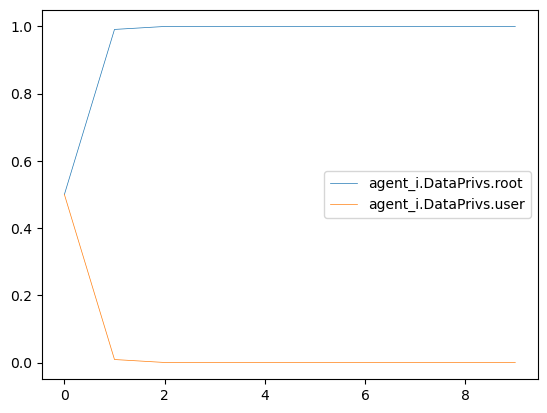

,agent_j.DataPrivs.root,agent_j.DataPrivs.user,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,1.0,RestrictAccPrivs,EnumAccounts,none
1,1.0,0.0,Nop,EnumAccounts,file_write
2,1.0,0.0,Nop,Exit,none
3,1.0,0.0,Nop,Nop,none
4,1.0,0.0,Nop,Nop,none
5,1.0,0.0,Nop,Nop,file_write
6,1.0,0.0,Nop,Nop,none
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,none
9,1.0,0.0,Nop,Nop,none


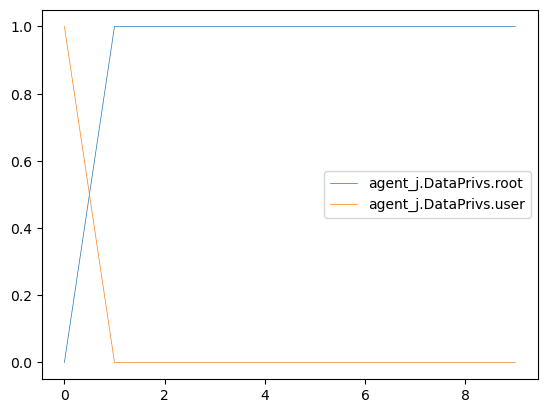

=============DataFound============


,state.DataFound.no,state.DataFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,EnumAccounts,RestrictAccPrivs
1,1.0,0.0,EnumAccounts,Nop
2,1.0,0.0,Exit,Nop
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


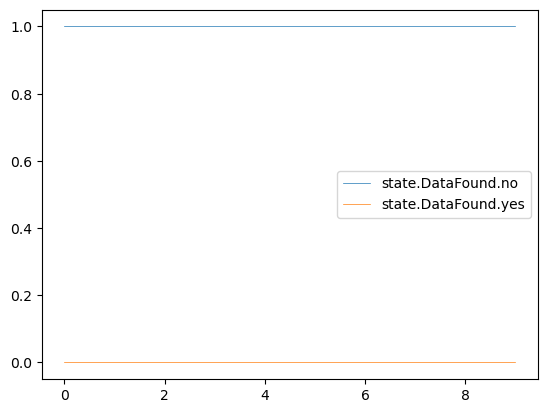

,agent_i.DataFound.no,agent_i.DataFound.yes,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,1.0,0.0,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,perms_change
1,1.0,0.0,EnumAccounts,Nop,denied,none,failure,active,none
2,1.0,0.0,Exit,Nop,denied,user_files,success,terminated,none
3,1.0,0.0,Nop,Nop,auth,none,success,terminated,none
4,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none
5,1.0,0.0,Nop,Nop,denied,user_files,success,terminated,none
6,1.0,0.0,Nop,Nop,denied,user_files,success,terminated,none
7,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none
8,1.0,0.0,Nop,Nop,auth,user_files,success,terminated,none
9,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none


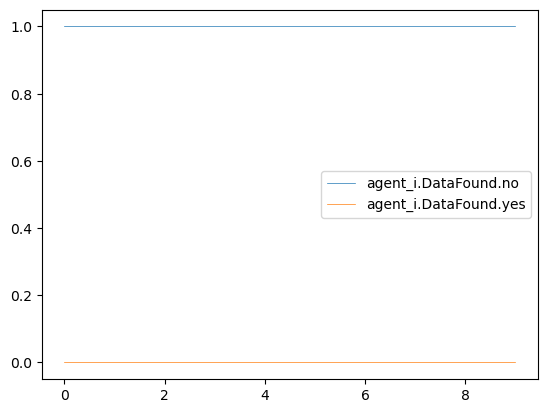

,agent_j.DataFound.no,agent_j.DataFound.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.000000,0.000000,RestrictAccPrivs,EnumAccounts,none
1,0.963636,0.036364,Nop,EnumAccounts,file_write
2,0.963735,0.036265,Nop,Exit,none
3,0.994597,0.005403,Nop,Nop,none
4,0.995055,0.004945,Nop,Nop,none
5,0.995055,0.004945,Nop,Nop,file_write
6,0.995055,0.004945,Nop,Nop,none
7,0.995055,0.004945,Nop,Nop,none
8,0.995055,0.004945,Nop,Nop,none
9,0.995055,0.004945,Nop,Nop,none


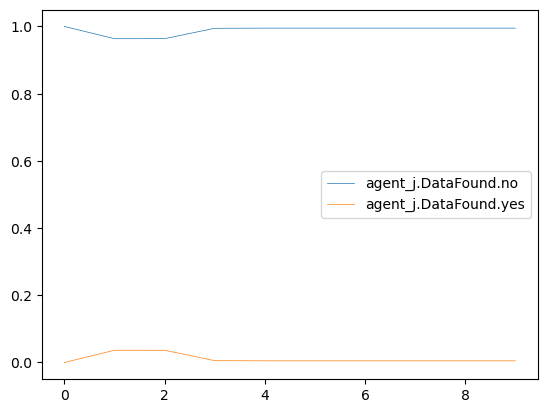

=============EscAccounts============


,state.EscAccounts.no,state.EscAccounts.yes,agent_i.action,agent_j.action
0,1.0,0.0,EnumAccounts,RestrictAccPrivs
1,1.0,0.0,EnumAccounts,Nop
2,1.0,0.0,Exit,Nop
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


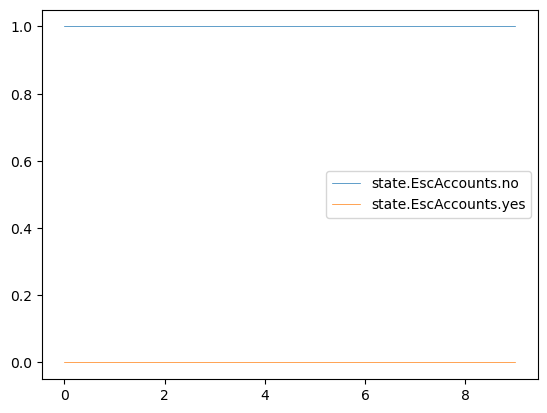

,agent_i.EscAccounts.no,agent_i.EscAccounts.yes,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.500000,0.500000,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,perms_change
1,0.761755,0.238244,EnumAccounts,Nop,denied,none,failure,active,none
2,0.935765,0.064235,Exit,Nop,denied,user_files,success,terminated,none
3,0.935765,0.064235,Nop,Nop,auth,none,success,terminated,none
4,0.935765,0.064235,Nop,Nop,denied,user_files,failure,terminated,none
5,0.935765,0.064235,Nop,Nop,denied,user_files,success,terminated,none
6,0.935765,0.064235,Nop,Nop,denied,user_files,success,terminated,none
7,0.935765,0.064235,Nop,Nop,denied,user_files,failure,terminated,none
8,0.935765,0.064235,Nop,Nop,auth,user_files,success,terminated,none
9,0.935765,0.064235,Nop,Nop,denied,user_files,failure,terminated,none


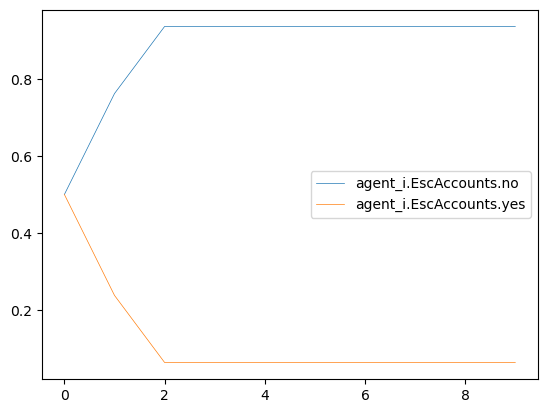

,agent_j.EscAccounts.no,agent_j.EscAccounts.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,RestrictAccPrivs,EnumAccounts,none
1,1.0,0.0,Nop,EnumAccounts,file_write
2,1.0,0.0,Nop,Exit,none
3,1.0,0.0,Nop,Nop,none
4,1.0,0.0,Nop,Nop,none
5,1.0,0.0,Nop,Nop,file_write
6,1.0,0.0,Nop,Nop,none
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,none
9,1.0,0.0,Nop,Nop,none


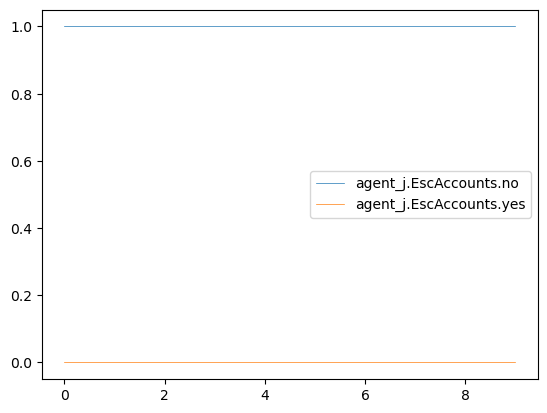

=============AccFound============


,state.AccFound.no,state.AccFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,EnumAccounts,RestrictAccPrivs
1,1.0,0.0,EnumAccounts,Nop
2,1.0,0.0,Exit,Nop
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


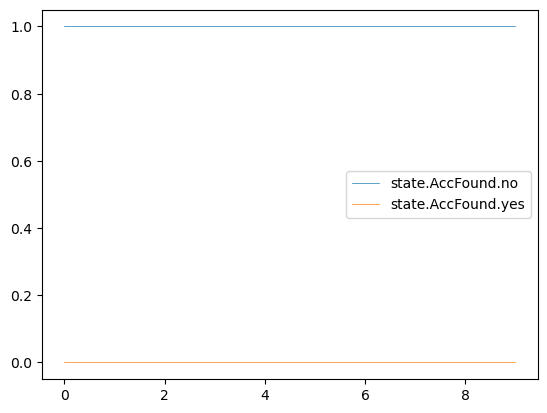

,agent_i.AccFound.no,agent_i.AccFound.yes,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,1.000000,0.000000,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,perms_change
1,0.931034,0.068966,EnumAccounts,Nop,denied,none,failure,active,none
2,0.973819,0.026181,Exit,Nop,denied,user_files,success,terminated,none
3,0.973819,0.026181,Nop,Nop,auth,none,success,terminated,none
4,0.973819,0.026181,Nop,Nop,denied,user_files,failure,terminated,none
5,0.973819,0.026181,Nop,Nop,denied,user_files,success,terminated,none
6,0.973819,0.026181,Nop,Nop,denied,user_files,success,terminated,none
7,0.973819,0.026181,Nop,Nop,denied,user_files,failure,terminated,none
8,0.973819,0.026181,Nop,Nop,auth,user_files,success,terminated,none
9,0.973819,0.026181,Nop,Nop,denied,user_files,failure,terminated,none


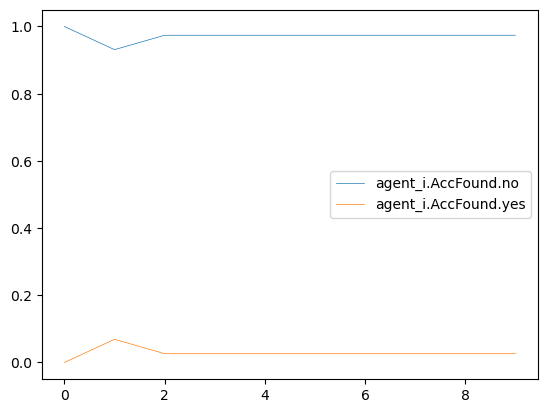

,agent_j.AccFound.no,agent_j.AccFound.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,RestrictAccPrivs,EnumAccounts,none
1,1.0,0.0,Nop,EnumAccounts,file_write
2,1.0,0.0,Nop,Exit,none
3,1.0,0.0,Nop,Nop,none
4,1.0,0.0,Nop,Nop,none
5,1.0,0.0,Nop,Nop,file_write
6,1.0,0.0,Nop,Nop,none
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,none
9,1.0,0.0,Nop,Nop,none


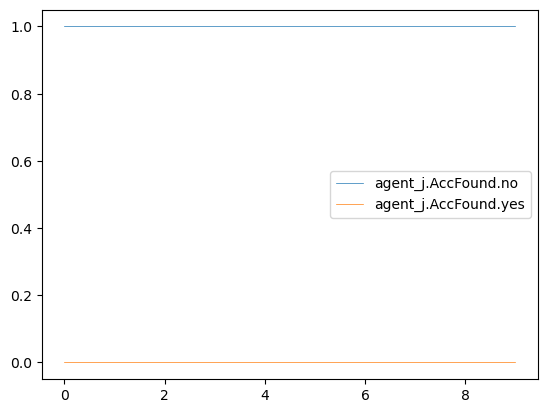

=============HostType============


,state.HostType.critical,state.HostType.critical_honeypot,state.HostType.honeypot,agent_i.action,agent_j.action
0,0.0,0.0,1.0,EnumAccounts,RestrictAccPrivs
1,0.0,0.0,1.0,EnumAccounts,Nop
2,0.0,0.0,1.0,Exit,Nop
3,0.0,0.0,1.0,Nop,Nop
4,0.0,0.0,1.0,Nop,Nop
5,0.0,0.0,1.0,Nop,Nop
6,0.0,0.0,1.0,Nop,Nop
7,0.0,0.0,1.0,Nop,Nop
8,0.0,0.0,1.0,Nop,Nop
9,0.0,0.0,1.0,Nop,Nop


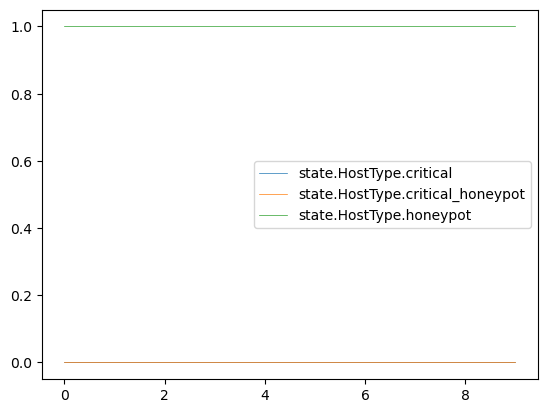

,agent_i.HostType.critical,agent_i.HostType.critical_honeypot,agent_i.HostType.honeypot,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.0,1.0,0.0,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,perms_change
1,0.0,1.0,0.0,EnumAccounts,Nop,denied,none,failure,active,none
2,0.0,1.0,0.0,Exit,Nop,denied,user_files,success,terminated,none
3,0.0,1.0,0.0,Nop,Nop,auth,none,success,terminated,none
4,0.0,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none
5,0.0,1.0,0.0,Nop,Nop,denied,user_files,success,terminated,none
6,0.0,1.0,0.0,Nop,Nop,denied,user_files,success,terminated,none
7,0.0,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none
8,0.0,1.0,0.0,Nop,Nop,auth,user_files,success,terminated,none
9,0.0,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none


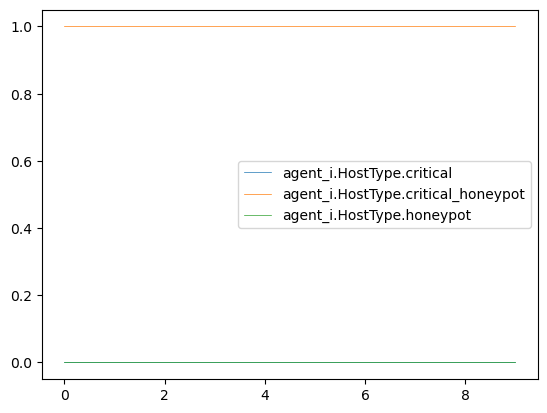

,agent_j.HostType.critical,agent_j.HostType.critical_honeypot,agent_j.HostType.honeypot,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,0.0,1.0,RestrictAccPrivs,EnumAccounts,none
1,0.0,0.0,1.0,Nop,EnumAccounts,file_write
2,0.0,0.0,1.0,Nop,Exit,none
3,0.0,0.0,1.0,Nop,Nop,none
4,0.0,0.0,1.0,Nop,Nop,none
5,0.0,0.0,1.0,Nop,Nop,file_write
6,0.0,0.0,1.0,Nop,Nop,none
7,0.0,0.0,1.0,Nop,Nop,none
8,0.0,0.0,1.0,Nop,Nop,none
9,0.0,0.0,1.0,Nop,Nop,none


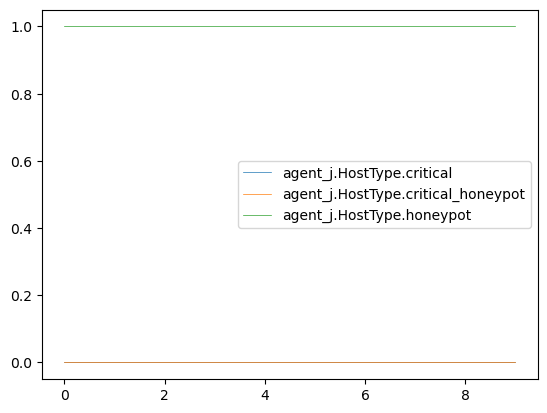

=============AttActive============


,state.AttActive.no,state.AttActive.yes,agent_i.action,agent_j.action
0,0.0,1.0,EnumAccounts,RestrictAccPrivs
1,0.0,1.0,EnumAccounts,Nop
2,1.0,0.0,Exit,Nop
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


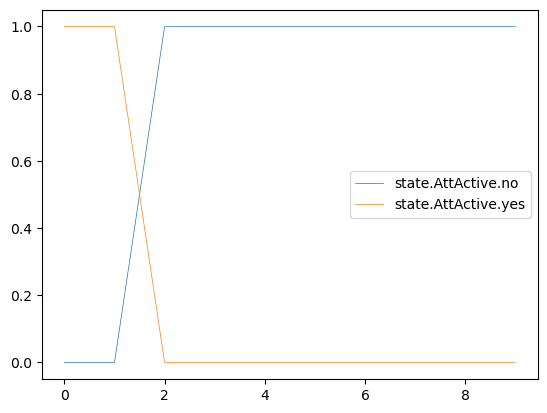

,agent_i.AttActive.no,agent_i.AttActive.yes,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.0,1.0,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,perms_change
1,0.0,1.0,EnumAccounts,Nop,denied,none,failure,active,none
2,0.0,1.0,Exit,Nop,denied,user_files,success,terminated,none
3,1.0,0.0,Nop,Nop,auth,none,success,terminated,none
4,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none
5,1.0,0.0,Nop,Nop,denied,user_files,success,terminated,none
6,1.0,0.0,Nop,Nop,denied,user_files,success,terminated,none
7,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none
8,1.0,0.0,Nop,Nop,auth,user_files,success,terminated,none
9,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none


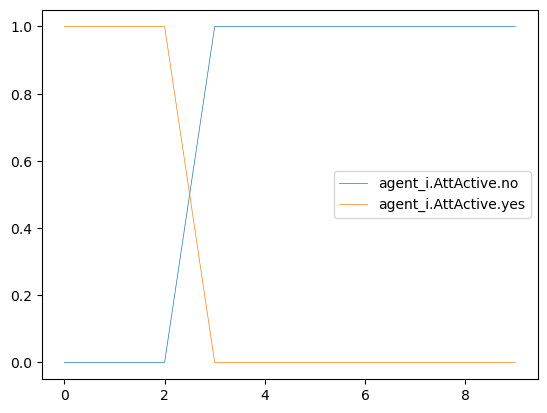

,agent_j.AttActive.no,agent_j.AttActive.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.500000,0.500000,RestrictAccPrivs,EnumAccounts,none
1,0.636364,0.363636,Nop,EnumAccounts,file_write
2,0.634633,0.365367,Nop,Exit,none
3,0.661895,0.338105,Nop,Nop,none
4,0.668542,0.331458,Nop,Nop,none
5,0.668709,0.331291,Nop,Nop,file_write
6,0.668710,0.331290,Nop,Nop,none
7,0.668710,0.331290,Nop,Nop,none
8,0.668710,0.331290,Nop,Nop,none
9,0.668710,0.331290,Nop,Nop,none


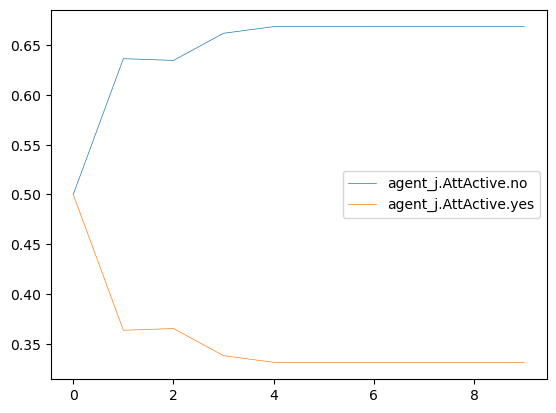

=============DataInjected============


,state.DataInjected.no,state.DataInjected.yes,agent_i.action,agent_j.action
0,1.0,0.0,EnumAccounts,RestrictAccPrivs
1,1.0,0.0,EnumAccounts,Nop
2,1.0,0.0,Exit,Nop
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


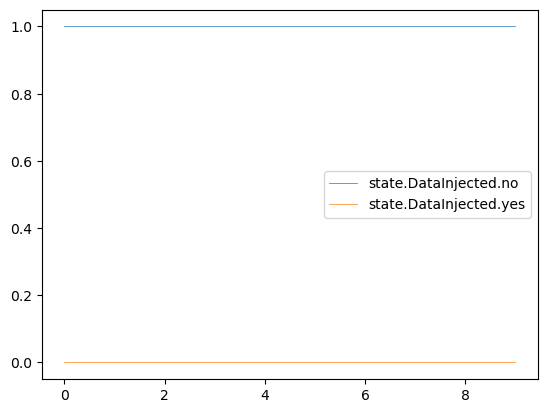

,agent_i.DataInjected.no,agent_i.DataInjected.yes,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,1.0,0.0,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,perms_change
1,1.0,0.0,EnumAccounts,Nop,denied,none,failure,active,none
2,1.0,0.0,Exit,Nop,denied,user_files,success,terminated,none
3,1.0,0.0,Nop,Nop,auth,none,success,terminated,none
4,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none
5,1.0,0.0,Nop,Nop,denied,user_files,success,terminated,none
6,1.0,0.0,Nop,Nop,denied,user_files,success,terminated,none
7,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none
8,1.0,0.0,Nop,Nop,auth,user_files,success,terminated,none
9,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none


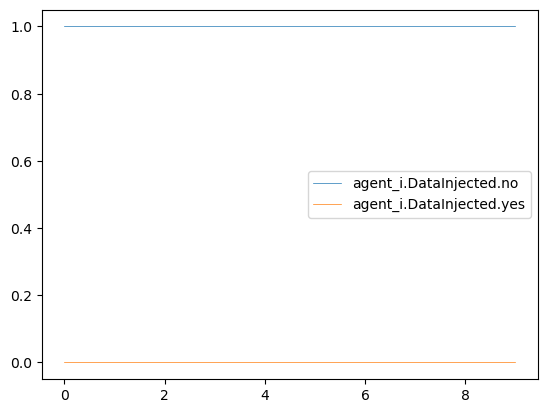

,agent_j.DataInjected.no,agent_j.DataInjected.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,RestrictAccPrivs,EnumAccounts,none
1,1.0,0.0,Nop,EnumAccounts,file_write
2,1.0,0.0,Nop,Exit,none
3,1.0,0.0,Nop,Nop,none
4,1.0,0.0,Nop,Nop,none
5,1.0,0.0,Nop,Nop,file_write
6,1.0,0.0,Nop,Nop,none
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,none
9,1.0,0.0,Nop,Nop,none


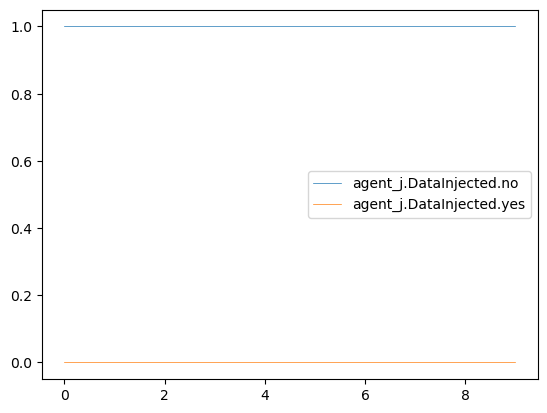

=============AccessLevel============


,state.AccessLevel.root,state.AccessLevel.user,agent_i.action,agent_j.action
0,0.0,1.0,EnumAccounts,RestrictAccPrivs
1,0.0,1.0,EnumAccounts,Nop
2,0.0,1.0,Exit,Nop
3,0.0,1.0,Nop,Nop
4,0.0,1.0,Nop,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


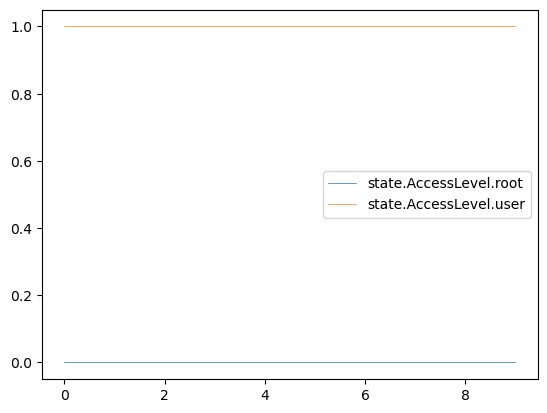

,agent_i.AccessLevel.root,agent_i.AccessLevel.user,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.0,1.0,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,perms_change
1,0.0,1.0,EnumAccounts,Nop,denied,none,failure,active,none
2,0.0,1.0,Exit,Nop,denied,user_files,success,terminated,none
3,0.0,1.0,Nop,Nop,auth,none,success,terminated,none
4,0.0,1.0,Nop,Nop,denied,user_files,failure,terminated,none
5,0.0,1.0,Nop,Nop,denied,user_files,success,terminated,none
6,0.0,1.0,Nop,Nop,denied,user_files,success,terminated,none
7,0.0,1.0,Nop,Nop,denied,user_files,failure,terminated,none
8,0.0,1.0,Nop,Nop,auth,user_files,success,terminated,none
9,0.0,1.0,Nop,Nop,denied,user_files,failure,terminated,none


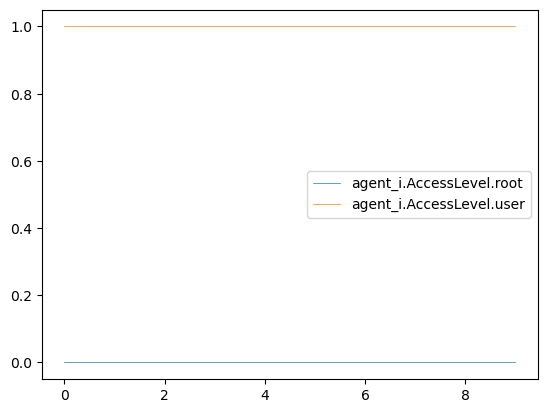

,agent_j.AccessLevel.root,agent_j.AccessLevel.user,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,1.0,RestrictAccPrivs,EnumAccounts,none
1,0.0,1.0,Nop,EnumAccounts,file_write
2,0.0,1.0,Nop,Exit,none
3,0.0,1.0,Nop,Nop,none
4,0.0,1.0,Nop,Nop,none
5,0.0,1.0,Nop,Nop,file_write
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,none


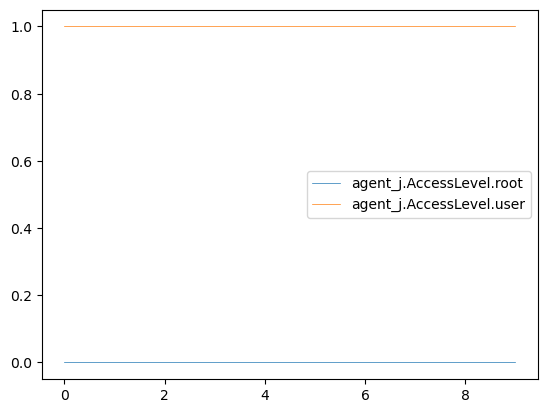

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


,agent_i.thetaj.DefFrame.highCap,agent_i.thetaj.DefFrame.lowCap,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.500000,0.500000,denied,user_files,failure,active,acc_policy_change
1,0.500000,0.500000,denied,user_files,failure,active,none
2,0.344282,0.655718,denied,none,success,terminated,none
3,0.344282,0.655718,denied,user_files,failure,terminated,none
4,0.344282,0.655718,auth,none,failure,terminated,none
5,0.344282,0.655718,denied,none,success,terminated,none
6,0.344282,0.655718,denied,user_files,failure,terminated,none
7,0.344282,0.655718,denied,user_files,success,terminated,none
8,0.344282,0.655718,denied,user_files,failure,terminated,none
9,0.344282,0.655718,denied,none,success,terminated,none


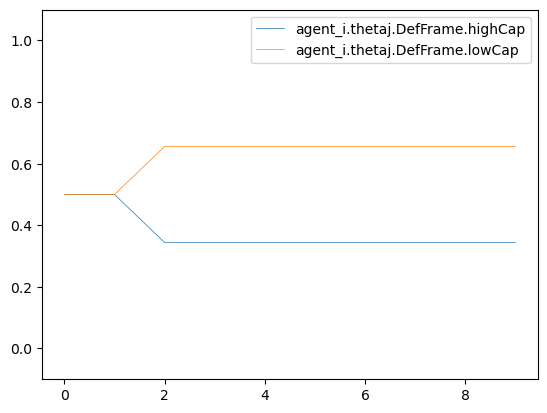

,agent_j.thetaj.AttackerFrame.att,agent_j.observation.EndPtAlerts'
0,1.0,file_enum
1,1.0,file_enum
2,1.0,none
3,1.0,file_enum
4,1.0,none
5,1.0,none
6,1.0,none
7,1.0,none
8,1.0,none
9,1.0,none


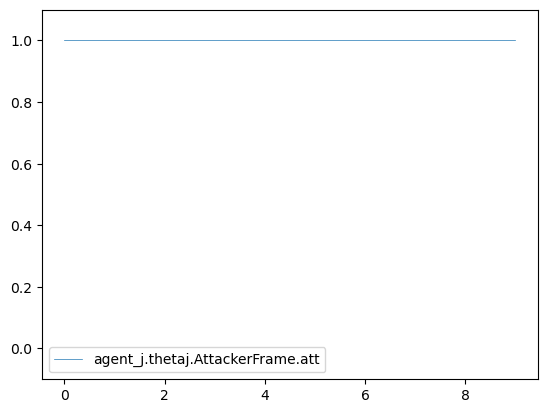

=============HostHasData============


,state.HostHasData.no,state.HostHasData.yes,agent_i.action,agent_j.action
0,0.0,1.0,EnumAccounts,RestrictAccPrivs
1,0.0,1.0,EnumAccounts,Nop
2,0.0,1.0,Exit,Nop
3,0.0,1.0,Nop,Nop
4,0.0,1.0,Nop,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


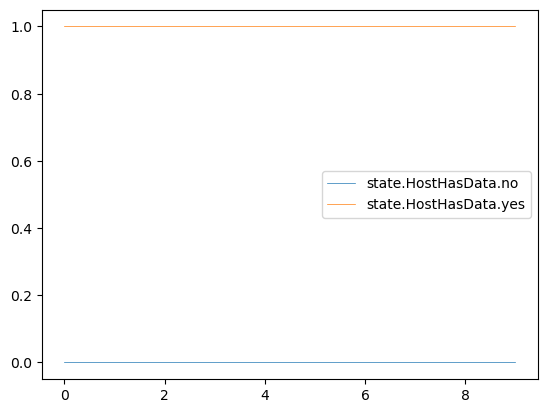

,agent_i.HostHasData.no,agent_i.HostHasData.yes,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.5,0.5,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,acc_policy_change
1,0.5,0.5,EnumAccounts,Nop,denied,user_files,failure,active,none
2,0.5,0.5,Exit,Nop,denied,none,success,terminated,none
3,0.5,0.5,Nop,Nop,denied,user_files,failure,terminated,none
4,0.5,0.5,Nop,Nop,auth,none,failure,terminated,none
5,0.5,0.5,Nop,Nop,denied,none,success,terminated,none
6,0.5,0.5,Nop,Nop,denied,user_files,failure,terminated,none
7,0.5,0.5,Nop,Nop,denied,user_files,success,terminated,none
8,0.5,0.5,Nop,Nop,denied,user_files,failure,terminated,none
9,0.5,0.5,Nop,Nop,denied,none,success,terminated,none


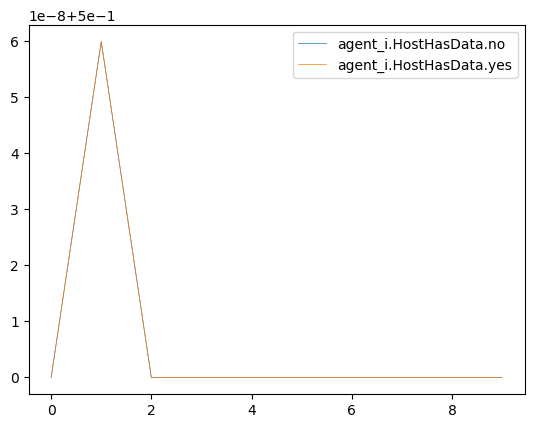

,agent_j.HostHasData.no,agent_j.HostHasData.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,1.0,RestrictAccPrivs,EnumAccounts,file_enum
1,0.0,1.0,Nop,EnumAccounts,file_enum
2,0.0,1.0,Nop,Exit,none
3,0.0,1.0,Nop,Nop,file_enum
4,0.0,1.0,Nop,Nop,none
5,0.0,1.0,Nop,Nop,none
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,none


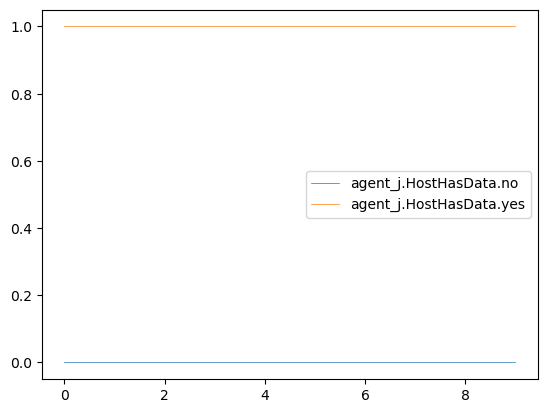

=============DataPrivs============


,state.DataPrivs.root,state.DataPrivs.user,agent_i.action,agent_j.action
0,1.0,0.0,EnumAccounts,RestrictAccPrivs
1,1.0,0.0,EnumAccounts,Nop
2,1.0,0.0,Exit,Nop
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


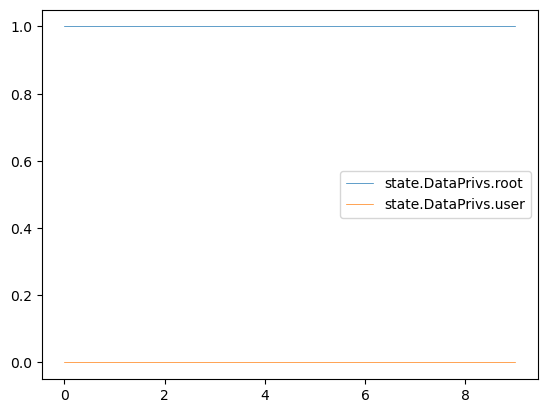

,agent_i.DataPrivs.root,agent_i.DataPrivs.user,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.500000,0.500000,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,acc_policy_change
1,0.875000,0.125000,EnumAccounts,Nop,denied,user_files,failure,active,none
2,0.994526,0.005474,Exit,Nop,denied,none,success,terminated,none
3,0.994526,0.005474,Nop,Nop,denied,user_files,failure,terminated,none
4,0.994526,0.005474,Nop,Nop,auth,none,failure,terminated,none
5,0.994526,0.005474,Nop,Nop,denied,none,success,terminated,none
6,0.994526,0.005474,Nop,Nop,denied,user_files,failure,terminated,none
7,0.994526,0.005474,Nop,Nop,denied,user_files,success,terminated,none
8,0.994526,0.005474,Nop,Nop,denied,user_files,failure,terminated,none
9,0.994526,0.005474,Nop,Nop,denied,none,success,terminated,none


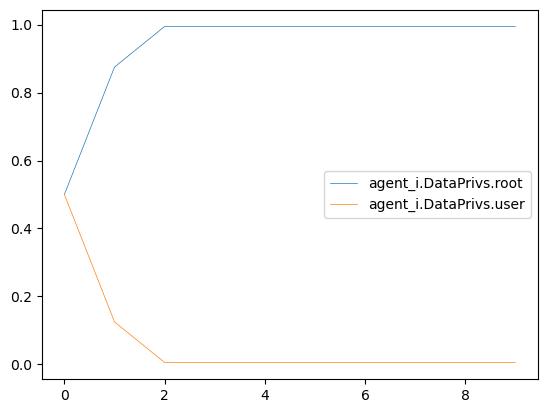

,agent_j.DataPrivs.root,agent_j.DataPrivs.user,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,1.0,RestrictAccPrivs,EnumAccounts,file_enum
1,1.0,0.0,Nop,EnumAccounts,file_enum
2,1.0,0.0,Nop,Exit,none
3,1.0,0.0,Nop,Nop,file_enum
4,1.0,0.0,Nop,Nop,none
5,1.0,0.0,Nop,Nop,none
6,1.0,0.0,Nop,Nop,none
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,none
9,1.0,0.0,Nop,Nop,none


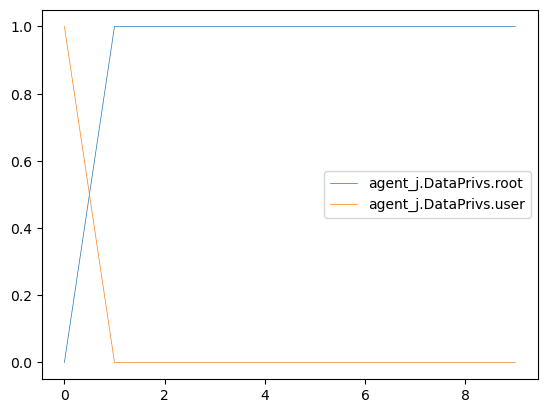

=============DataFound============


,state.DataFound.no,state.DataFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,EnumAccounts,RestrictAccPrivs
1,1.0,0.0,EnumAccounts,Nop
2,1.0,0.0,Exit,Nop
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


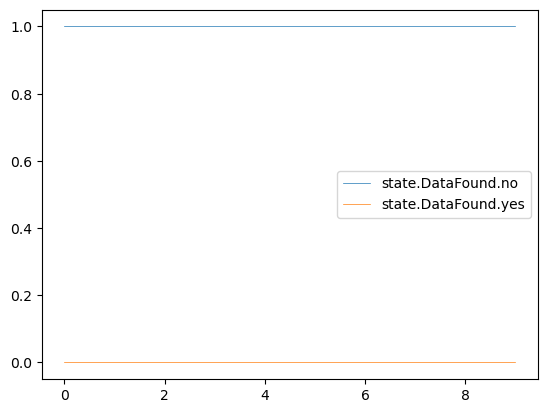

,agent_i.DataFound.no,agent_i.DataFound.yes,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,1.0,0.0,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,acc_policy_change
1,1.0,0.0,EnumAccounts,Nop,denied,user_files,failure,active,none
2,1.0,0.0,Exit,Nop,denied,none,success,terminated,none
3,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none
4,1.0,0.0,Nop,Nop,auth,none,failure,terminated,none
5,1.0,0.0,Nop,Nop,denied,none,success,terminated,none
6,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none
7,1.0,0.0,Nop,Nop,denied,user_files,success,terminated,none
8,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none
9,1.0,0.0,Nop,Nop,denied,none,success,terminated,none


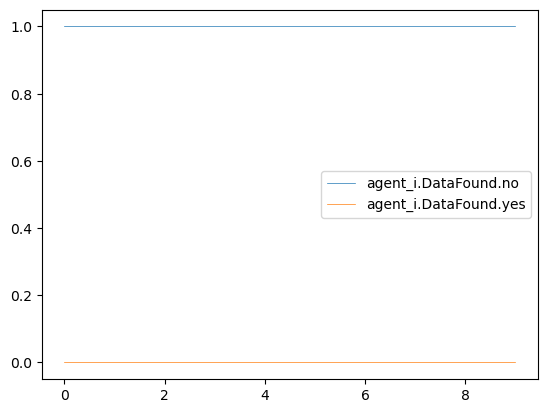

,agent_j.DataFound.no,agent_j.DataFound.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.000000,0.000000,RestrictAccPrivs,EnumAccounts,file_enum
1,0.440000,0.560000,Nop,EnumAccounts,file_enum
2,0.240015,0.759984,Nop,Exit,none
3,0.436621,0.563379,Nop,Nop,file_enum
4,0.366874,0.633126,Nop,Nop,none
5,0.364924,0.635076,Nop,Nop,none
6,0.364924,0.635076,Nop,Nop,none
7,0.364924,0.635076,Nop,Nop,none
8,0.364924,0.635076,Nop,Nop,none
9,0.364924,0.635076,Nop,Nop,none


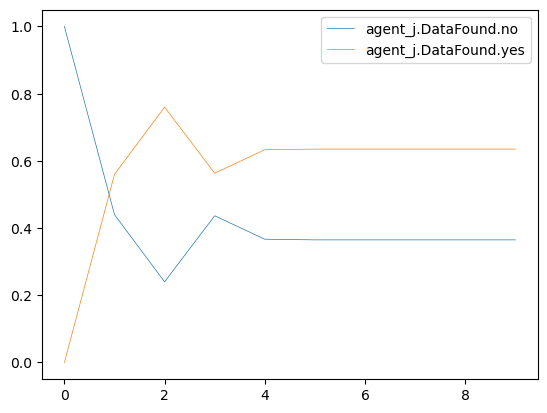

=============EscAccounts============


,state.EscAccounts.no,state.EscAccounts.yes,agent_i.action,agent_j.action
0,1.0,0.0,EnumAccounts,RestrictAccPrivs
1,1.0,0.0,EnumAccounts,Nop
2,1.0,0.0,Exit,Nop
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


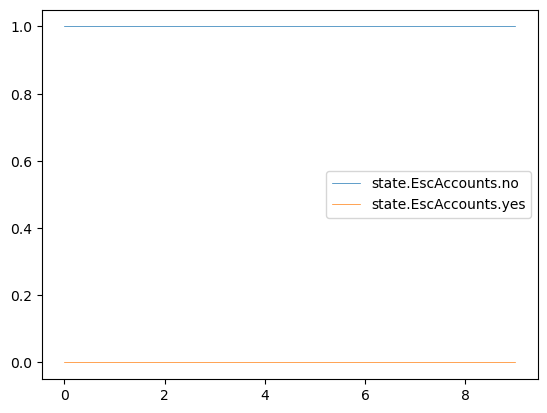

,agent_i.EscAccounts.no,agent_i.EscAccounts.yes,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.500000,0.500000,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,acc_policy_change
1,0.581897,0.418104,EnumAccounts,Nop,denied,user_files,failure,active,none
2,0.921250,0.078750,Exit,Nop,denied,none,success,terminated,none
3,0.921250,0.078750,Nop,Nop,denied,user_files,failure,terminated,none
4,0.921250,0.078750,Nop,Nop,auth,none,failure,terminated,none
5,0.921250,0.078750,Nop,Nop,denied,none,success,terminated,none
6,0.921250,0.078750,Nop,Nop,denied,user_files,failure,terminated,none
7,0.921250,0.078750,Nop,Nop,denied,user_files,success,terminated,none
8,0.921250,0.078750,Nop,Nop,denied,user_files,failure,terminated,none
9,0.921250,0.078750,Nop,Nop,denied,none,success,terminated,none


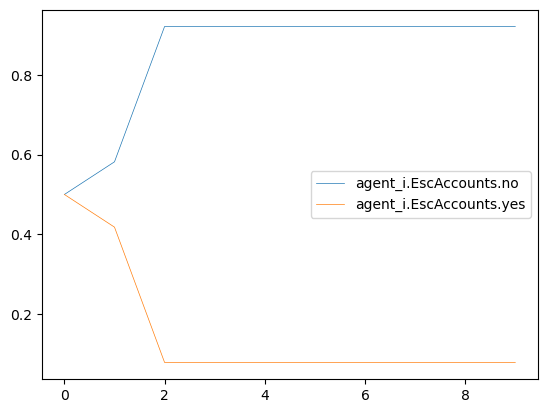

,agent_j.EscAccounts.no,agent_j.EscAccounts.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,RestrictAccPrivs,EnumAccounts,file_enum
1,1.0,0.0,Nop,EnumAccounts,file_enum
2,1.0,0.0,Nop,Exit,none
3,1.0,0.0,Nop,Nop,file_enum
4,1.0,0.0,Nop,Nop,none
5,1.0,0.0,Nop,Nop,none
6,1.0,0.0,Nop,Nop,none
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,none
9,1.0,0.0,Nop,Nop,none


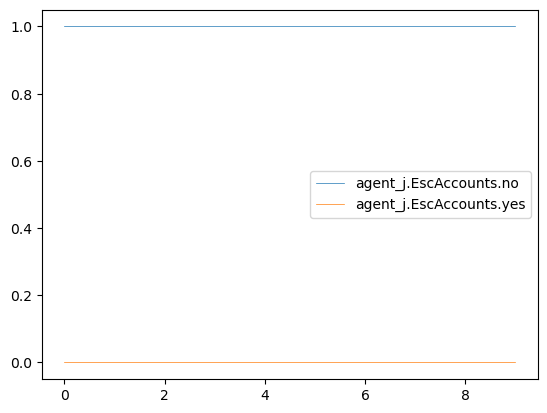

=============AccFound============


,state.AccFound.no,state.AccFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,EnumAccounts,RestrictAccPrivs
1,1.0,0.0,EnumAccounts,Nop
2,1.0,0.0,Exit,Nop
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


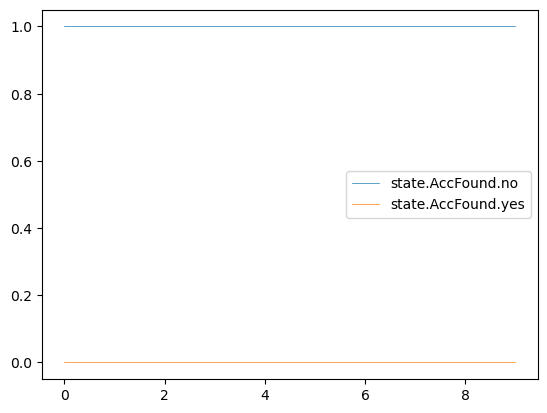

,agent_i.AccFound.no,agent_i.AccFound.yes,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,1.000000,0.000000,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,acc_policy_change
1,0.931035,0.068966,EnumAccounts,Nop,denied,user_files,failure,active,none
2,0.969155,0.030845,Exit,Nop,denied,none,success,terminated,none
3,0.969155,0.030845,Nop,Nop,denied,user_files,failure,terminated,none
4,0.969155,0.030845,Nop,Nop,auth,none,failure,terminated,none
5,0.969155,0.030845,Nop,Nop,denied,none,success,terminated,none
6,0.969155,0.030845,Nop,Nop,denied,user_files,failure,terminated,none
7,0.969155,0.030845,Nop,Nop,denied,user_files,success,terminated,none
8,0.969155,0.030845,Nop,Nop,denied,user_files,failure,terminated,none
9,0.969155,0.030845,Nop,Nop,denied,none,success,terminated,none


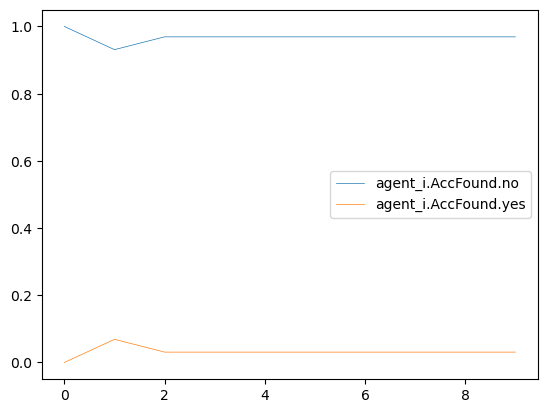

,agent_j.AccFound.no,agent_j.AccFound.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,RestrictAccPrivs,EnumAccounts,file_enum
1,1.0,0.0,Nop,EnumAccounts,file_enum
2,1.0,0.0,Nop,Exit,none
3,1.0,0.0,Nop,Nop,file_enum
4,1.0,0.0,Nop,Nop,none
5,1.0,0.0,Nop,Nop,none
6,1.0,0.0,Nop,Nop,none
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,none
9,1.0,0.0,Nop,Nop,none


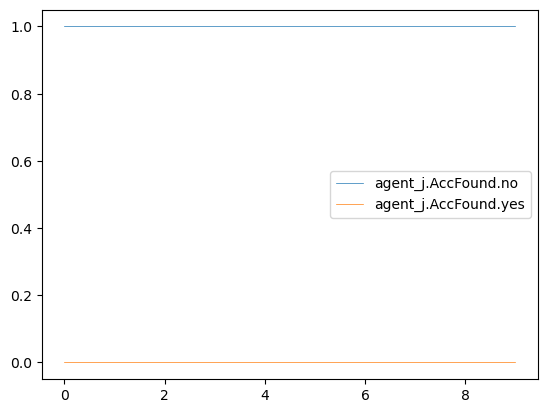

=============HostType============


,state.HostType.critical,state.HostType.critical_honeypot,state.HostType.honeypot,agent_i.action,agent_j.action
0,0.0,0.0,1.0,EnumAccounts,RestrictAccPrivs
1,0.0,0.0,1.0,EnumAccounts,Nop
2,0.0,0.0,1.0,Exit,Nop
3,0.0,0.0,1.0,Nop,Nop
4,0.0,0.0,1.0,Nop,Nop
5,0.0,0.0,1.0,Nop,Nop
6,0.0,0.0,1.0,Nop,Nop
7,0.0,0.0,1.0,Nop,Nop
8,0.0,0.0,1.0,Nop,Nop
9,0.0,0.0,1.0,Nop,Nop


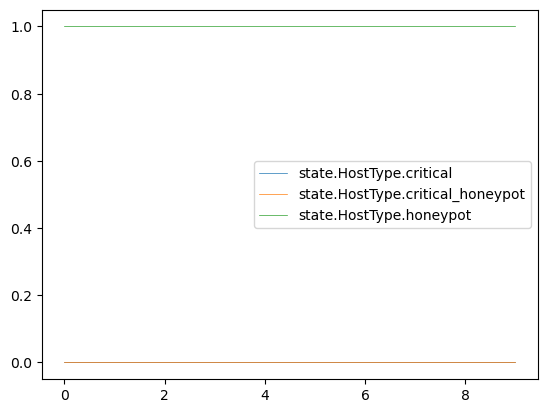

,agent_i.HostType.critical,agent_i.HostType.critical_honeypot,agent_i.HostType.honeypot,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.0,1.0,0.0,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,acc_policy_change
1,0.0,1.0,0.0,EnumAccounts,Nop,denied,user_files,failure,active,none
2,0.0,1.0,0.0,Exit,Nop,denied,none,success,terminated,none
3,0.0,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none
4,0.0,1.0,0.0,Nop,Nop,auth,none,failure,terminated,none
5,0.0,1.0,0.0,Nop,Nop,denied,none,success,terminated,none
6,0.0,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none
7,0.0,1.0,0.0,Nop,Nop,denied,user_files,success,terminated,none
8,0.0,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none
9,0.0,1.0,0.0,Nop,Nop,denied,none,success,terminated,none


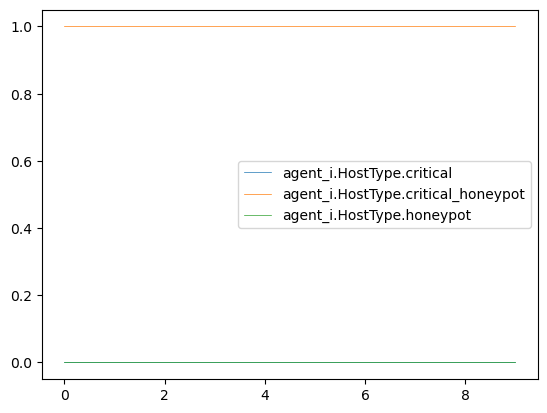

,agent_j.HostType.critical,agent_j.HostType.critical_honeypot,agent_j.HostType.honeypot,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,0.0,1.0,RestrictAccPrivs,EnumAccounts,file_enum
1,0.0,0.0,1.0,Nop,EnumAccounts,file_enum
2,0.0,0.0,1.0,Nop,Exit,none
3,0.0,0.0,1.0,Nop,Nop,file_enum
4,0.0,0.0,1.0,Nop,Nop,none
5,0.0,0.0,1.0,Nop,Nop,none
6,0.0,0.0,1.0,Nop,Nop,none
7,0.0,0.0,1.0,Nop,Nop,none
8,0.0,0.0,1.0,Nop,Nop,none
9,0.0,0.0,1.0,Nop,Nop,none


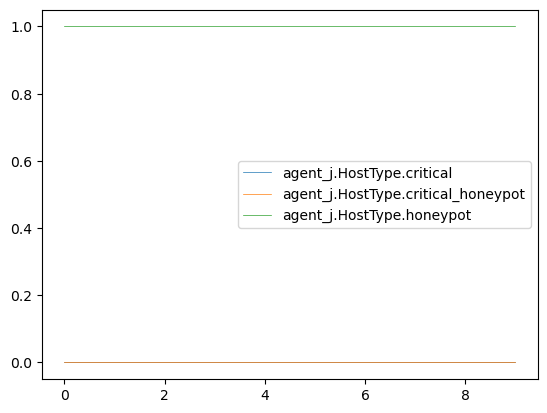

=============AttActive============


,state.AttActive.no,state.AttActive.yes,agent_i.action,agent_j.action
0,0.0,1.0,EnumAccounts,RestrictAccPrivs
1,0.0,1.0,EnumAccounts,Nop
2,1.0,0.0,Exit,Nop
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


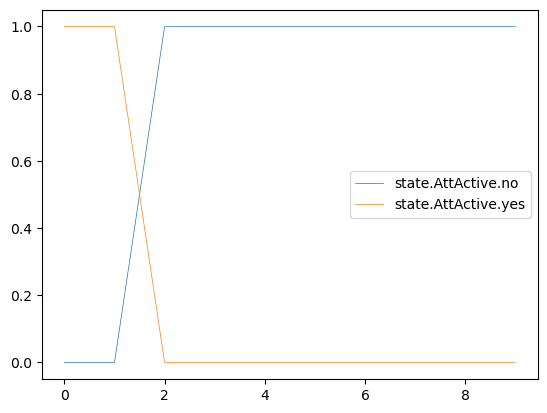

,agent_i.AttActive.no,agent_i.AttActive.yes,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.0,1.0,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,acc_policy_change
1,0.0,1.0,EnumAccounts,Nop,denied,user_files,failure,active,none
2,0.0,1.0,Exit,Nop,denied,none,success,terminated,none
3,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none
4,1.0,0.0,Nop,Nop,auth,none,failure,terminated,none
5,1.0,0.0,Nop,Nop,denied,none,success,terminated,none
6,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none
7,1.0,0.0,Nop,Nop,denied,user_files,success,terminated,none
8,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none
9,1.0,0.0,Nop,Nop,denied,none,success,terminated,none


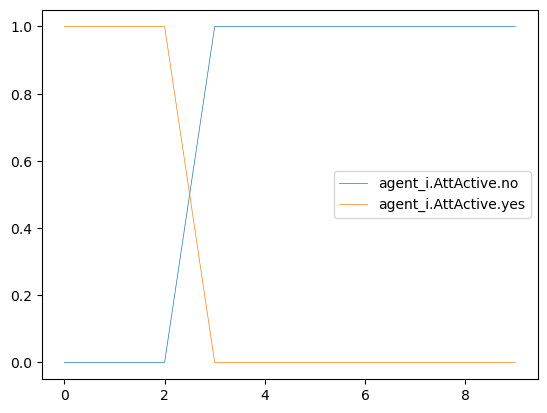

,agent_j.AttActive.no,agent_j.AttActive.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.500000,0.500000,RestrictAccPrivs,EnumAccounts,file_enum
1,0.200000,0.800000,Nop,EnumAccounts,file_enum
2,0.038775,0.961225,Nop,Exit,none
3,0.201210,0.798790,Nop,Nop,file_enum
4,0.577811,0.422189,Nop,Nop,none
5,0.928608,0.071392,Nop,Nop,none
6,0.929121,0.070879,Nop,Nop,none
7,0.929121,0.070879,Nop,Nop,none
8,0.929121,0.070879,Nop,Nop,none
9,0.929121,0.070879,Nop,Nop,none


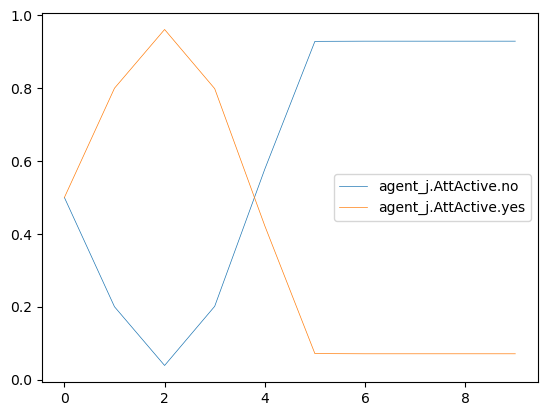

=============DataInjected============


,state.DataInjected.no,state.DataInjected.yes,agent_i.action,agent_j.action
0,1.0,0.0,EnumAccounts,RestrictAccPrivs
1,1.0,0.0,EnumAccounts,Nop
2,1.0,0.0,Exit,Nop
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


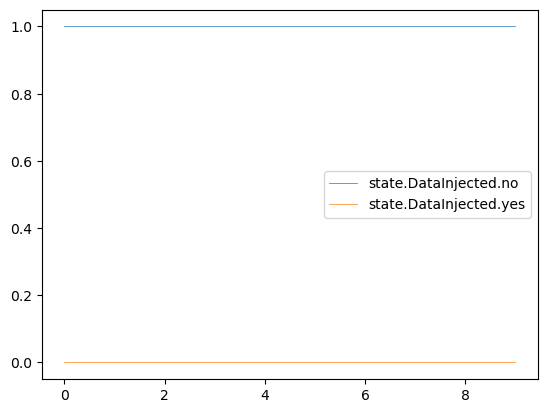

,agent_i.DataInjected.no,agent_i.DataInjected.yes,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,1.0,0.0,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,acc_policy_change
1,1.0,0.0,EnumAccounts,Nop,denied,user_files,failure,active,none
2,1.0,0.0,Exit,Nop,denied,none,success,terminated,none
3,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none
4,1.0,0.0,Nop,Nop,auth,none,failure,terminated,none
5,1.0,0.0,Nop,Nop,denied,none,success,terminated,none
6,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none
7,1.0,0.0,Nop,Nop,denied,user_files,success,terminated,none
8,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none
9,1.0,0.0,Nop,Nop,denied,none,success,terminated,none


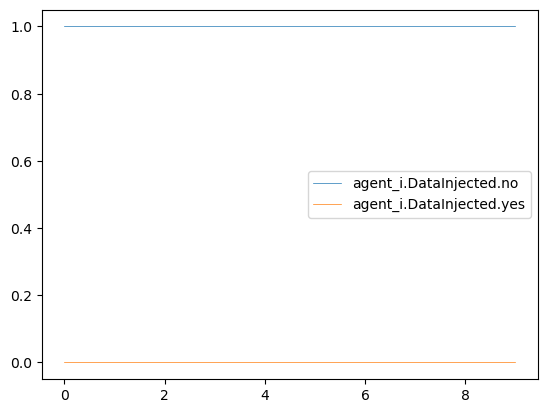

,agent_j.DataInjected.no,agent_j.DataInjected.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,RestrictAccPrivs,EnumAccounts,file_enum
1,1.0,0.0,Nop,EnumAccounts,file_enum
2,1.0,0.0,Nop,Exit,none
3,1.0,0.0,Nop,Nop,file_enum
4,1.0,0.0,Nop,Nop,none
5,1.0,0.0,Nop,Nop,none
6,1.0,0.0,Nop,Nop,none
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,none
9,1.0,0.0,Nop,Nop,none


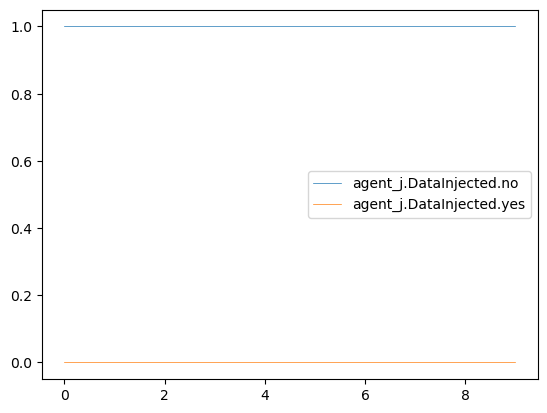

=============AccessLevel============


,state.AccessLevel.root,state.AccessLevel.user,agent_i.action,agent_j.action
0,0.0,1.0,EnumAccounts,RestrictAccPrivs
1,0.0,1.0,EnumAccounts,Nop
2,0.0,1.0,Exit,Nop
3,0.0,1.0,Nop,Nop
4,0.0,1.0,Nop,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


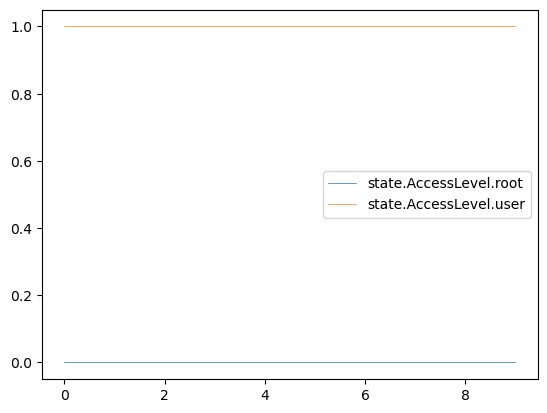

,agent_i.AccessLevel.root,agent_i.AccessLevel.user,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.0,1.0,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,acc_policy_change
1,0.0,1.0,EnumAccounts,Nop,denied,user_files,failure,active,none
2,0.0,1.0,Exit,Nop,denied,none,success,terminated,none
3,0.0,1.0,Nop,Nop,denied,user_files,failure,terminated,none
4,0.0,1.0,Nop,Nop,auth,none,failure,terminated,none
5,0.0,1.0,Nop,Nop,denied,none,success,terminated,none
6,0.0,1.0,Nop,Nop,denied,user_files,failure,terminated,none
7,0.0,1.0,Nop,Nop,denied,user_files,success,terminated,none
8,0.0,1.0,Nop,Nop,denied,user_files,failure,terminated,none
9,0.0,1.0,Nop,Nop,denied,none,success,terminated,none


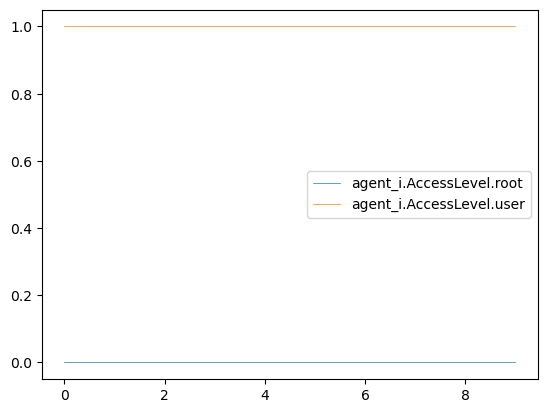

,agent_j.AccessLevel.root,agent_j.AccessLevel.user,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,1.0,RestrictAccPrivs,EnumAccounts,file_enum
1,0.0,1.0,Nop,EnumAccounts,file_enum
2,0.0,1.0,Nop,Exit,none
3,0.0,1.0,Nop,Nop,file_enum
4,0.0,1.0,Nop,Nop,none
5,0.0,1.0,Nop,Nop,none
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,none


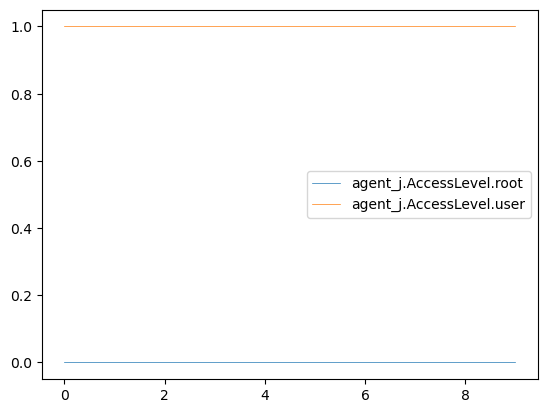

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


,agent_i.thetaj.DefFrame.highCap,agent_i.thetaj.DefFrame.lowCap,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.500000,0.500000,denied,user_files,failure,active,acc_policy_change
1,0.500000,0.500000,denied,none,failure,active,none
2,0.344282,0.655718,auth,none,success,terminated,none
3,0.344282,0.655718,auth,user_files,failure,terminated,none
4,0.344282,0.655718,denied,none,success,terminated,none
5,0.344282,0.655718,auth,none,failure,terminated,none
6,0.344282,0.655718,denied,none,failure,terminated,none
7,0.344282,0.655718,auth,user_files,failure,terminated,none
8,0.344282,0.655718,auth,user_files,success,terminated,none
9,0.344282,0.655718,auth,none,success,terminated,none


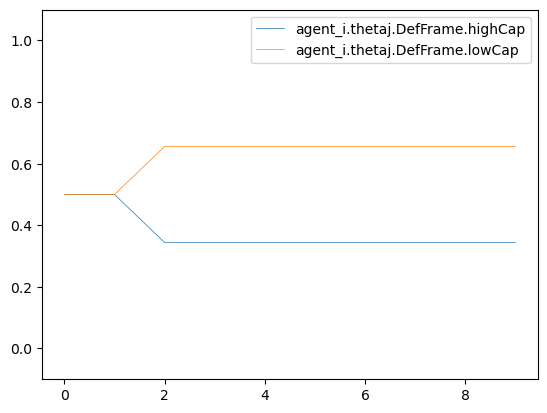

,agent_j.thetaj.AttackerFrame.att,agent_j.observation.EndPtAlerts'
0,1.0,file_enum
1,1.0,login_activity
2,1.0,none
3,1.0,none
4,1.0,none
5,1.0,none
6,1.0,none
7,1.0,none
8,1.0,none
9,1.0,file_enum


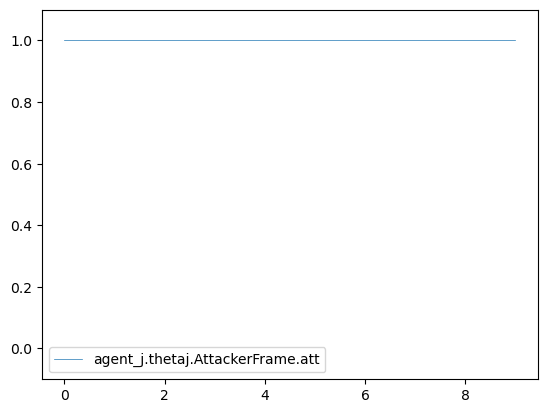

=============HostHasData============


,state.HostHasData.no,state.HostHasData.yes,agent_i.action,agent_j.action
0,0.0,1.0,EnumAccounts,RestrictAccPrivs
1,0.0,1.0,EnumAccounts,Nop
2,0.0,1.0,Exit,Nop
3,0.0,1.0,Nop,Nop
4,0.0,1.0,Nop,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


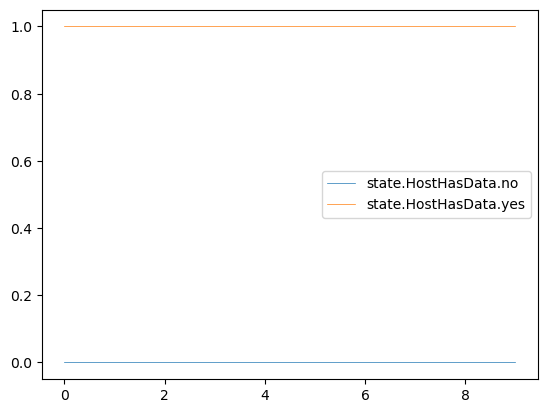

,agent_i.HostHasData.no,agent_i.HostHasData.yes,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.5,0.5,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,acc_policy_change
1,0.5,0.5,EnumAccounts,Nop,denied,none,failure,active,none
2,0.5,0.5,Exit,Nop,auth,none,success,terminated,none
3,0.5,0.5,Nop,Nop,auth,user_files,failure,terminated,none
4,0.5,0.5,Nop,Nop,denied,none,success,terminated,none
5,0.5,0.5,Nop,Nop,auth,none,failure,terminated,none
6,0.5,0.5,Nop,Nop,denied,none,failure,terminated,none
7,0.5,0.5,Nop,Nop,auth,user_files,failure,terminated,none
8,0.5,0.5,Nop,Nop,auth,user_files,success,terminated,none
9,0.5,0.5,Nop,Nop,auth,none,success,terminated,none


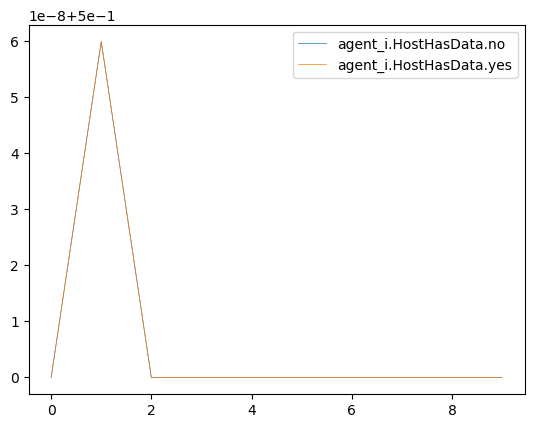

,agent_j.HostHasData.no,agent_j.HostHasData.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,1.0,RestrictAccPrivs,EnumAccounts,file_enum
1,0.0,1.0,Nop,EnumAccounts,login_activity
2,0.0,1.0,Nop,Exit,none
3,0.0,1.0,Nop,Nop,none
4,0.0,1.0,Nop,Nop,none
5,0.0,1.0,Nop,Nop,none
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,file_enum


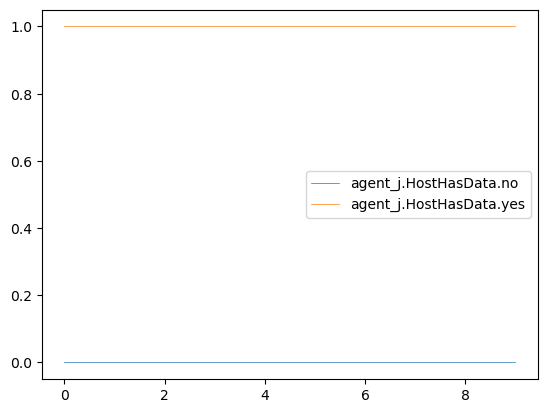

=============DataPrivs============


,state.DataPrivs.root,state.DataPrivs.user,agent_i.action,agent_j.action
0,1.0,0.0,EnumAccounts,RestrictAccPrivs
1,1.0,0.0,EnumAccounts,Nop
2,1.0,0.0,Exit,Nop
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


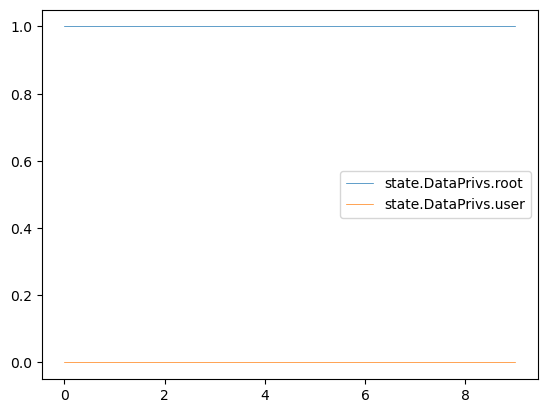

,agent_i.DataPrivs.root,agent_i.DataPrivs.user,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.500000,0.500000,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,acc_policy_change
1,0.875000,0.125000,EnumAccounts,Nop,denied,none,failure,active,none
2,0.994526,0.005474,Exit,Nop,auth,none,success,terminated,none
3,0.994526,0.005474,Nop,Nop,auth,user_files,failure,terminated,none
4,0.994526,0.005474,Nop,Nop,denied,none,success,terminated,none
5,0.994526,0.005474,Nop,Nop,auth,none,failure,terminated,none
6,0.994526,0.005474,Nop,Nop,denied,none,failure,terminated,none
7,0.994526,0.005474,Nop,Nop,auth,user_files,failure,terminated,none
8,0.994526,0.005474,Nop,Nop,auth,user_files,success,terminated,none
9,0.994526,0.005474,Nop,Nop,auth,none,success,terminated,none


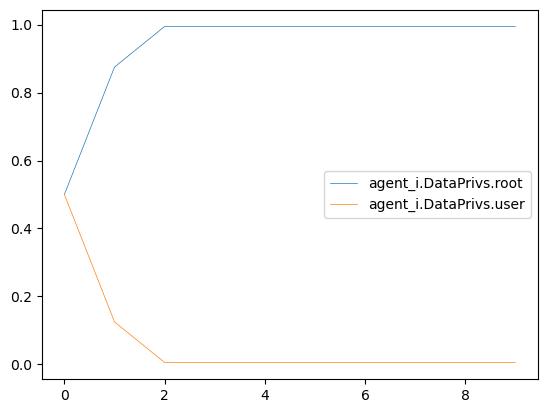

,agent_j.DataPrivs.root,agent_j.DataPrivs.user,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,1.0,RestrictAccPrivs,EnumAccounts,file_enum
1,1.0,0.0,Nop,EnumAccounts,login_activity
2,1.0,0.0,Nop,Exit,none
3,1.0,0.0,Nop,Nop,none
4,1.0,0.0,Nop,Nop,none
5,1.0,0.0,Nop,Nop,none
6,1.0,0.0,Nop,Nop,none
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,none
9,1.0,0.0,Nop,Nop,file_enum


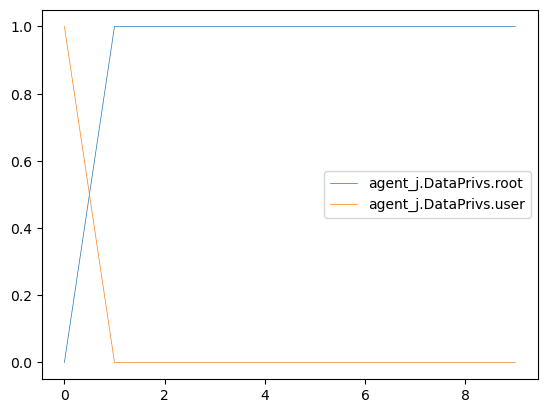

=============DataFound============


,state.DataFound.no,state.DataFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,EnumAccounts,RestrictAccPrivs
1,1.0,0.0,EnumAccounts,Nop
2,1.0,0.0,Exit,Nop
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


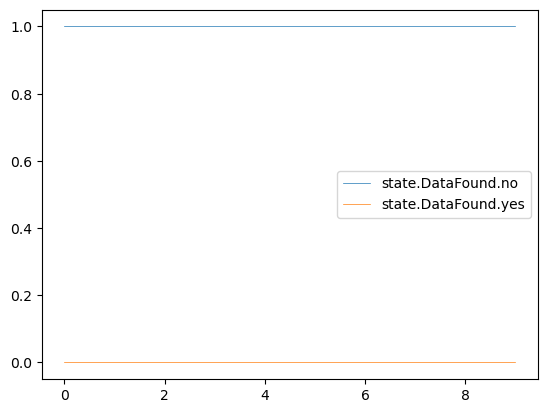

,agent_i.DataFound.no,agent_i.DataFound.yes,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,1.0,0.0,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,acc_policy_change
1,1.0,0.0,EnumAccounts,Nop,denied,none,failure,active,none
2,1.0,0.0,Exit,Nop,auth,none,success,terminated,none
3,1.0,0.0,Nop,Nop,auth,user_files,failure,terminated,none
4,1.0,0.0,Nop,Nop,denied,none,success,terminated,none
5,1.0,0.0,Nop,Nop,auth,none,failure,terminated,none
6,1.0,0.0,Nop,Nop,denied,none,failure,terminated,none
7,1.0,0.0,Nop,Nop,auth,user_files,failure,terminated,none
8,1.0,0.0,Nop,Nop,auth,user_files,success,terminated,none
9,1.0,0.0,Nop,Nop,auth,none,success,terminated,none


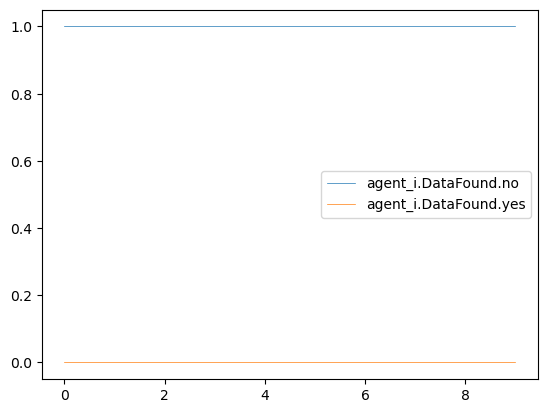

,agent_j.DataFound.no,agent_j.DataFound.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.000000,0.000000,RestrictAccPrivs,EnumAccounts,file_enum
1,0.440000,0.560000,Nop,EnumAccounts,login_activity
2,0.440000,0.560000,Nop,Exit,none
3,0.800001,0.199998,Nop,Nop,none
4,0.812419,0.187581,Nop,Nop,none
5,0.812405,0.187595,Nop,Nop,none
6,0.812405,0.187595,Nop,Nop,none
7,0.812405,0.187595,Nop,Nop,none
8,0.812405,0.187595,Nop,Nop,none
9,0.812405,0.187595,Nop,Nop,file_enum


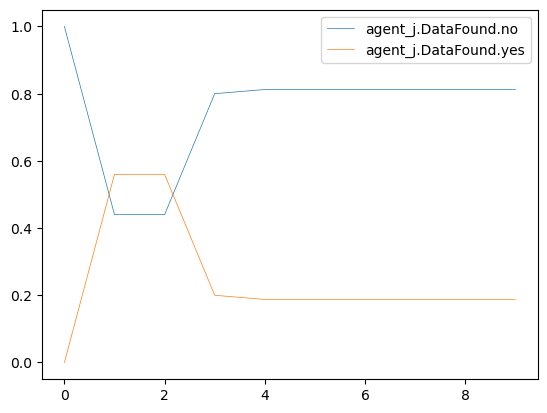

=============EscAccounts============


,state.EscAccounts.no,state.EscAccounts.yes,agent_i.action,agent_j.action
0,1.0,0.0,EnumAccounts,RestrictAccPrivs
1,1.0,0.0,EnumAccounts,Nop
2,1.0,0.0,Exit,Nop
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


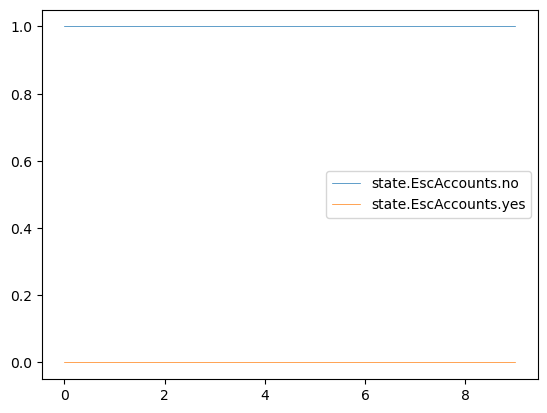

,agent_i.EscAccounts.no,agent_i.EscAccounts.yes,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.500000,0.500000,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,acc_policy_change
1,0.581897,0.418104,EnumAccounts,Nop,denied,none,failure,active,none
2,0.921250,0.078750,Exit,Nop,auth,none,success,terminated,none
3,0.921250,0.078750,Nop,Nop,auth,user_files,failure,terminated,none
4,0.921250,0.078750,Nop,Nop,denied,none,success,terminated,none
5,0.921250,0.078750,Nop,Nop,auth,none,failure,terminated,none
6,0.921250,0.078750,Nop,Nop,denied,none,failure,terminated,none
7,0.921250,0.078750,Nop,Nop,auth,user_files,failure,terminated,none
8,0.921250,0.078750,Nop,Nop,auth,user_files,success,terminated,none
9,0.921250,0.078750,Nop,Nop,auth,none,success,terminated,none


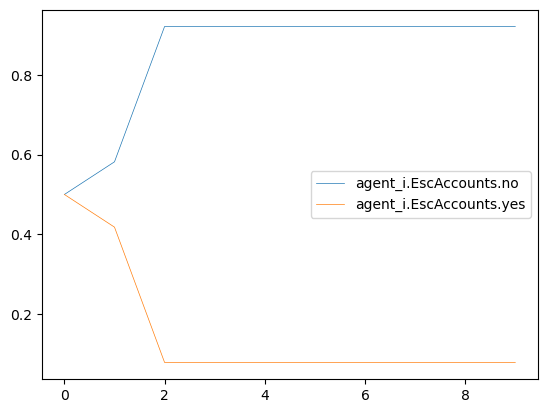

,agent_j.EscAccounts.no,agent_j.EscAccounts.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,RestrictAccPrivs,EnumAccounts,file_enum
1,1.0,0.0,Nop,EnumAccounts,login_activity
2,1.0,0.0,Nop,Exit,none
3,1.0,0.0,Nop,Nop,none
4,1.0,0.0,Nop,Nop,none
5,1.0,0.0,Nop,Nop,none
6,1.0,0.0,Nop,Nop,none
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,none
9,1.0,0.0,Nop,Nop,file_enum


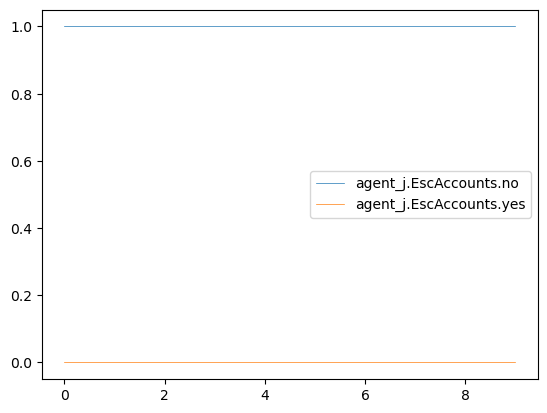

=============AccFound============


,state.AccFound.no,state.AccFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,EnumAccounts,RestrictAccPrivs
1,1.0,0.0,EnumAccounts,Nop
2,1.0,0.0,Exit,Nop
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


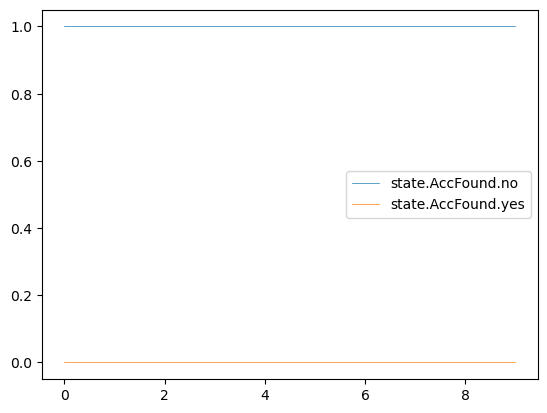

,agent_i.AccFound.no,agent_i.AccFound.yes,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,1.000000,0.000000,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,acc_policy_change
1,0.931035,0.068966,EnumAccounts,Nop,denied,none,failure,active,none
2,0.969155,0.030845,Exit,Nop,auth,none,success,terminated,none
3,0.969155,0.030845,Nop,Nop,auth,user_files,failure,terminated,none
4,0.969155,0.030845,Nop,Nop,denied,none,success,terminated,none
5,0.969155,0.030845,Nop,Nop,auth,none,failure,terminated,none
6,0.969155,0.030845,Nop,Nop,denied,none,failure,terminated,none
7,0.969155,0.030845,Nop,Nop,auth,user_files,failure,terminated,none
8,0.969155,0.030845,Nop,Nop,auth,user_files,success,terminated,none
9,0.969155,0.030845,Nop,Nop,auth,none,success,terminated,none


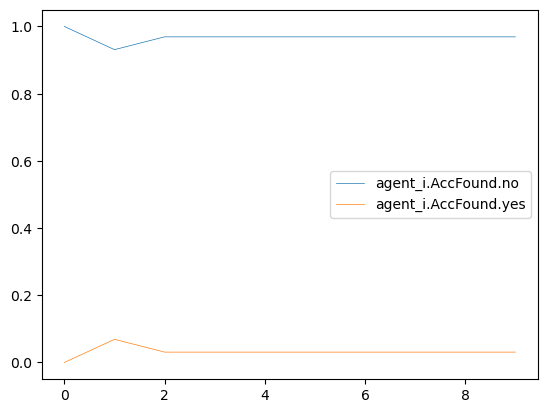

,agent_j.AccFound.no,agent_j.AccFound.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,RestrictAccPrivs,EnumAccounts,file_enum
1,1.0,0.0,Nop,EnumAccounts,login_activity
2,1.0,0.0,Nop,Exit,none
3,1.0,0.0,Nop,Nop,none
4,1.0,0.0,Nop,Nop,none
5,1.0,0.0,Nop,Nop,none
6,1.0,0.0,Nop,Nop,none
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,none
9,1.0,0.0,Nop,Nop,file_enum


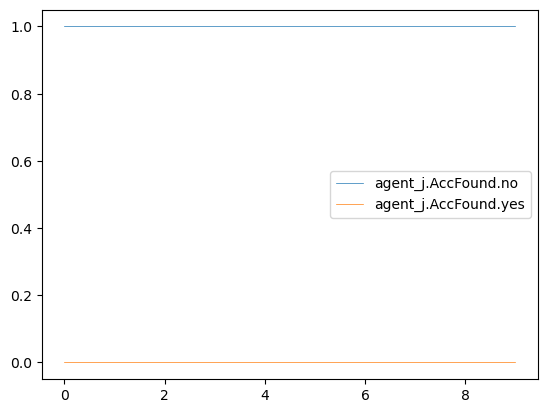

=============HostType============


,state.HostType.critical,state.HostType.critical_honeypot,state.HostType.honeypot,agent_i.action,agent_j.action
0,0.0,0.0,1.0,EnumAccounts,RestrictAccPrivs
1,0.0,0.0,1.0,EnumAccounts,Nop
2,0.0,0.0,1.0,Exit,Nop
3,0.0,0.0,1.0,Nop,Nop
4,0.0,0.0,1.0,Nop,Nop
5,0.0,0.0,1.0,Nop,Nop
6,0.0,0.0,1.0,Nop,Nop
7,0.0,0.0,1.0,Nop,Nop
8,0.0,0.0,1.0,Nop,Nop
9,0.0,0.0,1.0,Nop,Nop


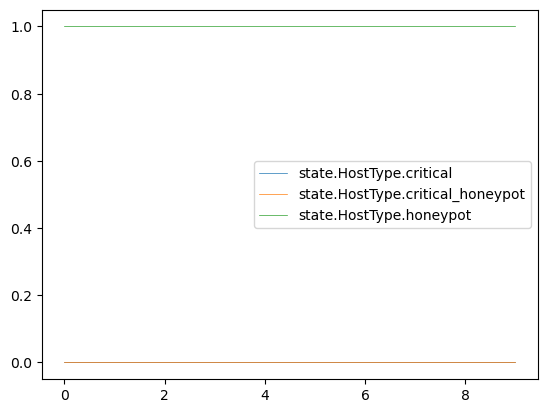

,agent_i.HostType.critical,agent_i.HostType.critical_honeypot,agent_i.HostType.honeypot,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.0,1.0,0.0,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,acc_policy_change
1,0.0,1.0,0.0,EnumAccounts,Nop,denied,none,failure,active,none
2,0.0,1.0,0.0,Exit,Nop,auth,none,success,terminated,none
3,0.0,1.0,0.0,Nop,Nop,auth,user_files,failure,terminated,none
4,0.0,1.0,0.0,Nop,Nop,denied,none,success,terminated,none
5,0.0,1.0,0.0,Nop,Nop,auth,none,failure,terminated,none
6,0.0,1.0,0.0,Nop,Nop,denied,none,failure,terminated,none
7,0.0,1.0,0.0,Nop,Nop,auth,user_files,failure,terminated,none
8,0.0,1.0,0.0,Nop,Nop,auth,user_files,success,terminated,none
9,0.0,1.0,0.0,Nop,Nop,auth,none,success,terminated,none


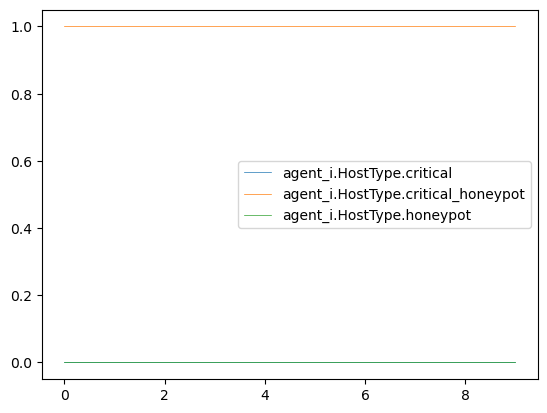

,agent_j.HostType.critical,agent_j.HostType.critical_honeypot,agent_j.HostType.honeypot,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,0.0,1.0,RestrictAccPrivs,EnumAccounts,file_enum
1,0.0,0.0,1.0,Nop,EnumAccounts,login_activity
2,0.0,0.0,1.0,Nop,Exit,none
3,0.0,0.0,1.0,Nop,Nop,none
4,0.0,0.0,1.0,Nop,Nop,none
5,0.0,0.0,1.0,Nop,Nop,none
6,0.0,0.0,1.0,Nop,Nop,none
7,0.0,0.0,1.0,Nop,Nop,none
8,0.0,0.0,1.0,Nop,Nop,none
9,0.0,0.0,1.0,Nop,Nop,file_enum


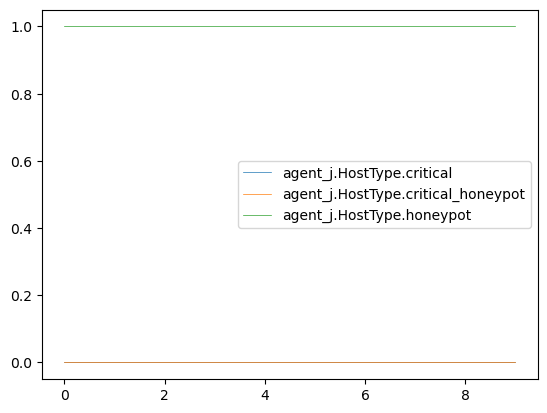

=============AttActive============


,state.AttActive.no,state.AttActive.yes,agent_i.action,agent_j.action
0,0.0,1.0,EnumAccounts,RestrictAccPrivs
1,0.0,1.0,EnumAccounts,Nop
2,1.0,0.0,Exit,Nop
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


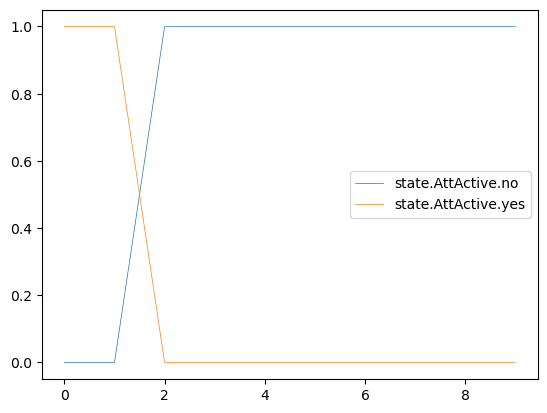

,agent_i.AttActive.no,agent_i.AttActive.yes,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.0,1.0,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,acc_policy_change
1,0.0,1.0,EnumAccounts,Nop,denied,none,failure,active,none
2,0.0,1.0,Exit,Nop,auth,none,success,terminated,none
3,1.0,0.0,Nop,Nop,auth,user_files,failure,terminated,none
4,1.0,0.0,Nop,Nop,denied,none,success,terminated,none
5,1.0,0.0,Nop,Nop,auth,none,failure,terminated,none
6,1.0,0.0,Nop,Nop,denied,none,failure,terminated,none
7,1.0,0.0,Nop,Nop,auth,user_files,failure,terminated,none
8,1.0,0.0,Nop,Nop,auth,user_files,success,terminated,none
9,1.0,0.0,Nop,Nop,auth,none,success,terminated,none


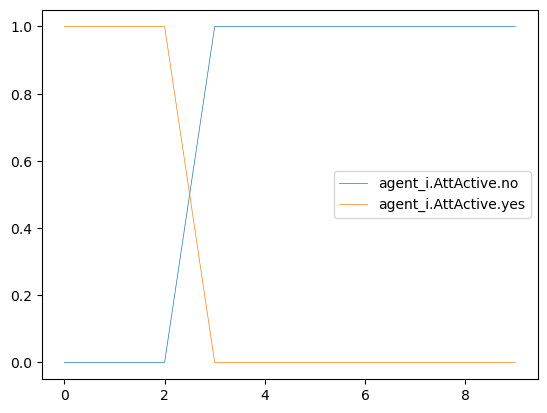

,agent_j.AttActive.no,agent_j.AttActive.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.500000,0.500000,RestrictAccPrivs,EnumAccounts,file_enum
1,0.200000,0.800000,Nop,EnumAccounts,login_activity
2,0.200000,0.800000,Nop,Exit,none
3,0.500005,0.499995,Nop,Nop,none
4,0.739236,0.260764,Nop,Nop,none
5,0.743510,0.256490,Nop,Nop,none
6,0.743523,0.256477,Nop,Nop,none
7,0.743523,0.256477,Nop,Nop,none
8,0.743523,0.256477,Nop,Nop,none
9,0.743523,0.256477,Nop,Nop,file_enum


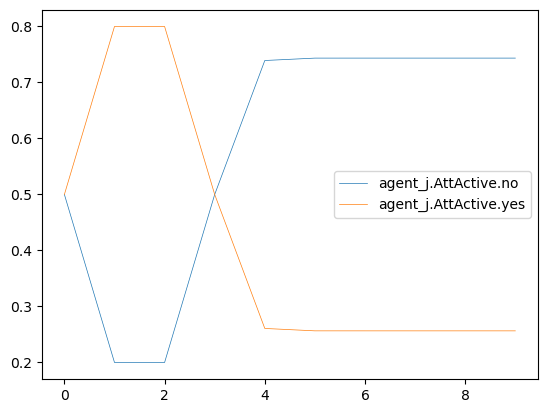

=============DataInjected============


,state.DataInjected.no,state.DataInjected.yes,agent_i.action,agent_j.action
0,1.0,0.0,EnumAccounts,RestrictAccPrivs
1,1.0,0.0,EnumAccounts,Nop
2,1.0,0.0,Exit,Nop
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


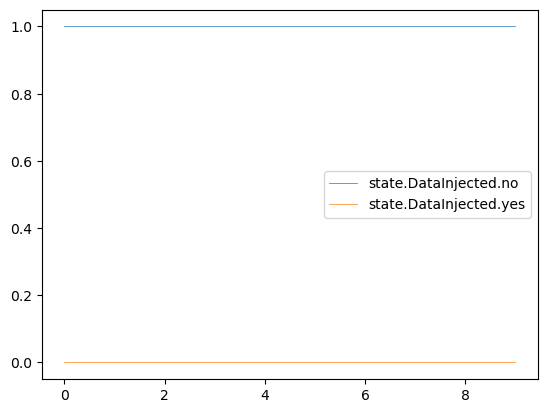

,agent_i.DataInjected.no,agent_i.DataInjected.yes,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,1.0,0.0,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,acc_policy_change
1,1.0,0.0,EnumAccounts,Nop,denied,none,failure,active,none
2,1.0,0.0,Exit,Nop,auth,none,success,terminated,none
3,1.0,0.0,Nop,Nop,auth,user_files,failure,terminated,none
4,1.0,0.0,Nop,Nop,denied,none,success,terminated,none
5,1.0,0.0,Nop,Nop,auth,none,failure,terminated,none
6,1.0,0.0,Nop,Nop,denied,none,failure,terminated,none
7,1.0,0.0,Nop,Nop,auth,user_files,failure,terminated,none
8,1.0,0.0,Nop,Nop,auth,user_files,success,terminated,none
9,1.0,0.0,Nop,Nop,auth,none,success,terminated,none


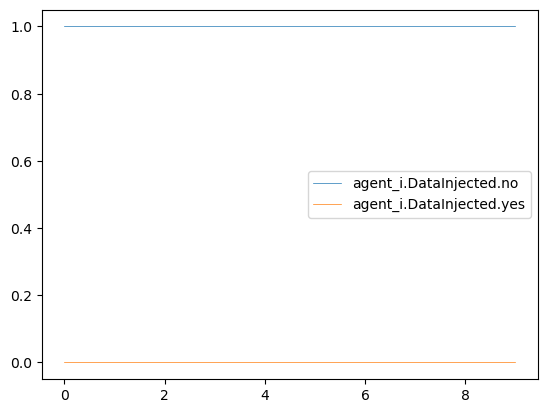

,agent_j.DataInjected.no,agent_j.DataInjected.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,RestrictAccPrivs,EnumAccounts,file_enum
1,1.0,0.0,Nop,EnumAccounts,login_activity
2,1.0,0.0,Nop,Exit,none
3,1.0,0.0,Nop,Nop,none
4,1.0,0.0,Nop,Nop,none
5,1.0,0.0,Nop,Nop,none
6,1.0,0.0,Nop,Nop,none
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,none
9,1.0,0.0,Nop,Nop,file_enum


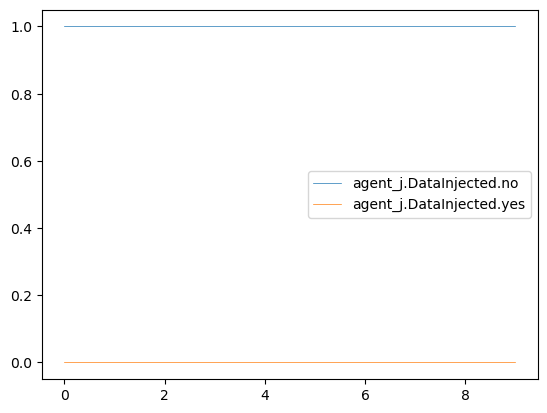

=============AccessLevel============


,state.AccessLevel.root,state.AccessLevel.user,agent_i.action,agent_j.action
0,0.0,1.0,EnumAccounts,RestrictAccPrivs
1,0.0,1.0,EnumAccounts,Nop
2,0.0,1.0,Exit,Nop
3,0.0,1.0,Nop,Nop
4,0.0,1.0,Nop,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


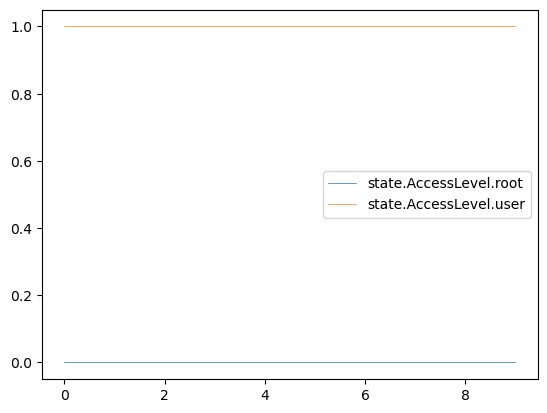

,agent_i.AccessLevel.root,agent_i.AccessLevel.user,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.0,1.0,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,acc_policy_change
1,0.0,1.0,EnumAccounts,Nop,denied,none,failure,active,none
2,0.0,1.0,Exit,Nop,auth,none,success,terminated,none
3,0.0,1.0,Nop,Nop,auth,user_files,failure,terminated,none
4,0.0,1.0,Nop,Nop,denied,none,success,terminated,none
5,0.0,1.0,Nop,Nop,auth,none,failure,terminated,none
6,0.0,1.0,Nop,Nop,denied,none,failure,terminated,none
7,0.0,1.0,Nop,Nop,auth,user_files,failure,terminated,none
8,0.0,1.0,Nop,Nop,auth,user_files,success,terminated,none
9,0.0,1.0,Nop,Nop,auth,none,success,terminated,none


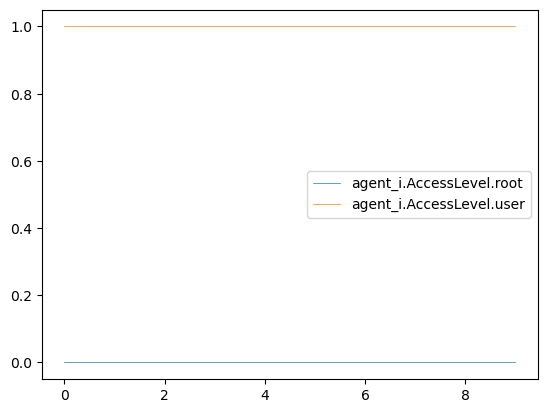

,agent_j.AccessLevel.root,agent_j.AccessLevel.user,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,1.0,RestrictAccPrivs,EnumAccounts,file_enum
1,0.0,1.0,Nop,EnumAccounts,login_activity
2,0.0,1.0,Nop,Exit,none
3,0.0,1.0,Nop,Nop,none
4,0.0,1.0,Nop,Nop,none
5,0.0,1.0,Nop,Nop,none
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,file_enum


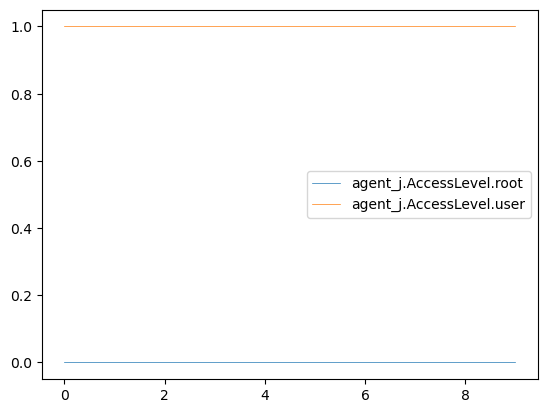

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


,agent_i.thetaj.DefFrame.highCap,agent_i.thetaj.DefFrame.lowCap,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.500000,0.500000,denied,user_files,failure,active,perms_change
1,0.345455,0.654545,denied,user_files,failure,active,none
2,0.333951,0.666049,denied,user_files,success,terminated,none
3,0.333951,0.666049,denied,user_files,failure,terminated,none
4,0.333951,0.666049,denied,none,failure,terminated,none
5,0.333951,0.666049,auth,none,failure,terminated,none
6,0.333951,0.666049,auth,user_files,failure,terminated,none
7,0.333951,0.666049,denied,user_files,failure,terminated,none
8,0.333951,0.666049,auth,none,success,terminated,none
9,0.333951,0.666049,auth,user_files,failure,terminated,none


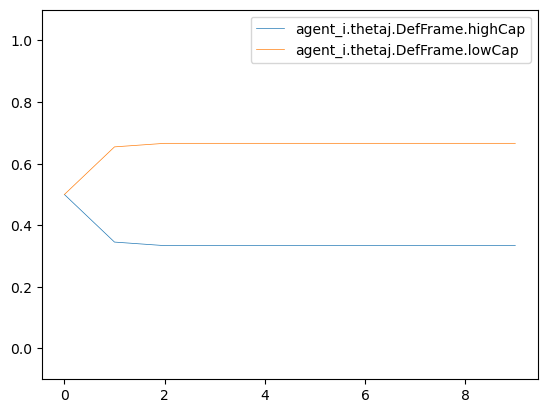

,agent_j.thetaj.AttackerFrame.att,agent_j.observation.EndPtAlerts'
0,1.0,file_enum
1,1.0,file_write
2,1.0,file_enum
3,1.0,file_write
4,1.0,none
5,1.0,none
6,1.0,none
7,1.0,none
8,1.0,none
9,1.0,file_write


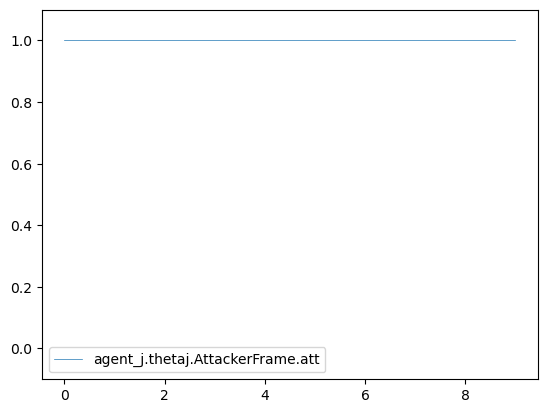

=============HostHasData============


,state.HostHasData.no,state.HostHasData.yes,agent_i.action,agent_j.action
0,0.0,1.0,EnumAccounts,RestrictAccPrivs
1,0.0,1.0,EnumAccounts,Nop
2,0.0,1.0,Exit,Nop
3,0.0,1.0,Nop,Nop
4,0.0,1.0,Nop,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


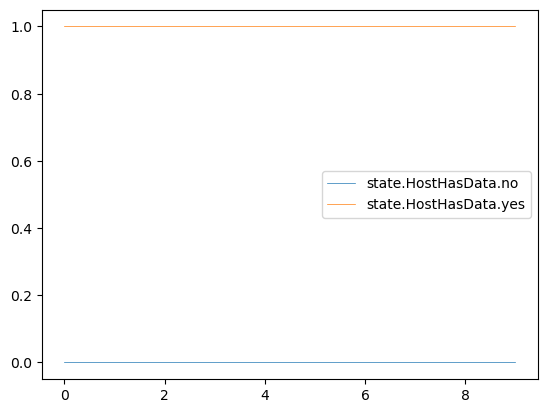

,agent_i.HostHasData.no,agent_i.HostHasData.yes,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.5,0.5,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,perms_change
1,0.5,0.5,EnumAccounts,Nop,denied,user_files,failure,active,none
2,0.5,0.5,Exit,Nop,denied,user_files,success,terminated,none
3,0.5,0.5,Nop,Nop,denied,user_files,failure,terminated,none
4,0.5,0.5,Nop,Nop,denied,none,failure,terminated,none
5,0.5,0.5,Nop,Nop,auth,none,failure,terminated,none
6,0.5,0.5,Nop,Nop,auth,user_files,failure,terminated,none
7,0.5,0.5,Nop,Nop,denied,user_files,failure,terminated,none
8,0.5,0.5,Nop,Nop,auth,none,success,terminated,none
9,0.5,0.5,Nop,Nop,auth,user_files,failure,terminated,none


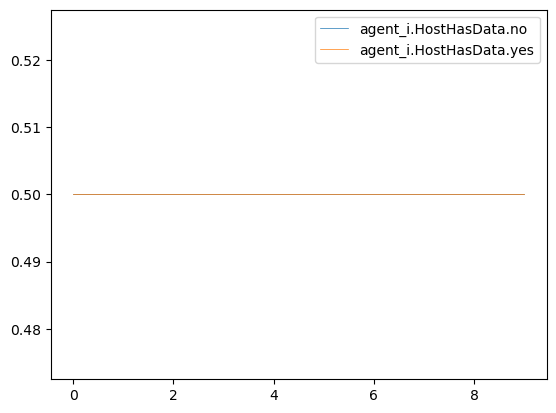

,agent_j.HostHasData.no,agent_j.HostHasData.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,1.0,RestrictAccPrivs,EnumAccounts,file_enum
1,0.0,1.0,Nop,EnumAccounts,file_write
2,0.0,1.0,Nop,Exit,file_enum
3,0.0,1.0,Nop,Nop,file_write
4,0.0,1.0,Nop,Nop,none
5,0.0,1.0,Nop,Nop,none
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,file_write


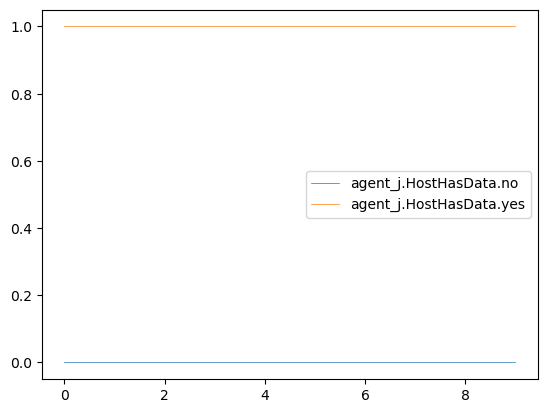

=============DataPrivs============


,state.DataPrivs.root,state.DataPrivs.user,agent_i.action,agent_j.action
0,1.0,0.0,EnumAccounts,RestrictAccPrivs
1,1.0,0.0,EnumAccounts,Nop
2,1.0,0.0,Exit,Nop
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


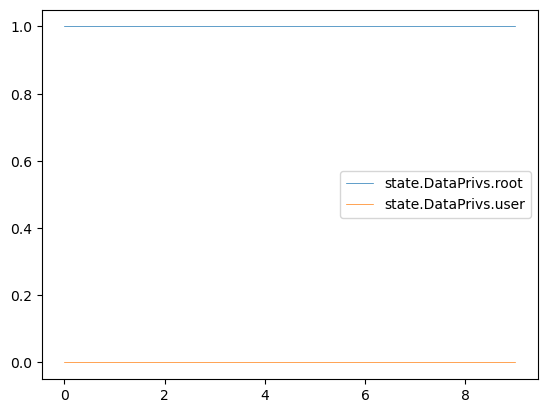

,agent_i.DataPrivs.root,agent_i.DataPrivs.user,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.500000,0.500000,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,perms_change
1,0.990909,0.009091,EnumAccounts,Nop,denied,user_files,failure,active,none
2,0.999691,0.000309,Exit,Nop,denied,user_files,success,terminated,none
3,0.999691,0.000309,Nop,Nop,denied,user_files,failure,terminated,none
4,0.999691,0.000309,Nop,Nop,denied,none,failure,terminated,none
5,0.999691,0.000309,Nop,Nop,auth,none,failure,terminated,none
6,0.999691,0.000309,Nop,Nop,auth,user_files,failure,terminated,none
7,0.999691,0.000309,Nop,Nop,denied,user_files,failure,terminated,none
8,0.999691,0.000309,Nop,Nop,auth,none,success,terminated,none
9,0.999691,0.000309,Nop,Nop,auth,user_files,failure,terminated,none


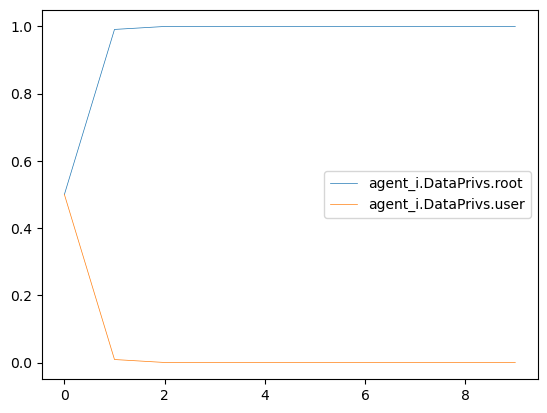

,agent_j.DataPrivs.root,agent_j.DataPrivs.user,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,1.0,RestrictAccPrivs,EnumAccounts,file_enum
1,1.0,0.0,Nop,EnumAccounts,file_write
2,1.0,0.0,Nop,Exit,file_enum
3,1.0,0.0,Nop,Nop,file_write
4,1.0,0.0,Nop,Nop,none
5,1.0,0.0,Nop,Nop,none
6,1.0,0.0,Nop,Nop,none
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,none
9,1.0,0.0,Nop,Nop,file_write


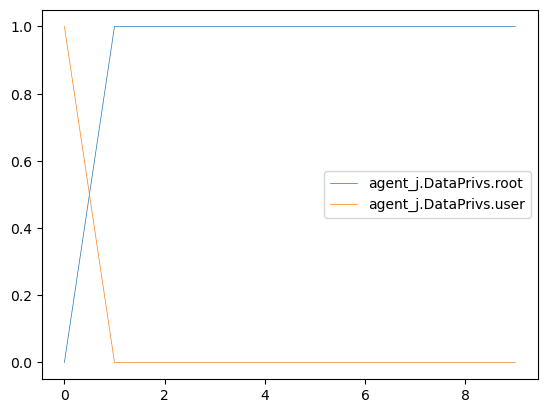

=============DataFound============


,state.DataFound.no,state.DataFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,EnumAccounts,RestrictAccPrivs
1,1.0,0.0,EnumAccounts,Nop
2,1.0,0.0,Exit,Nop
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


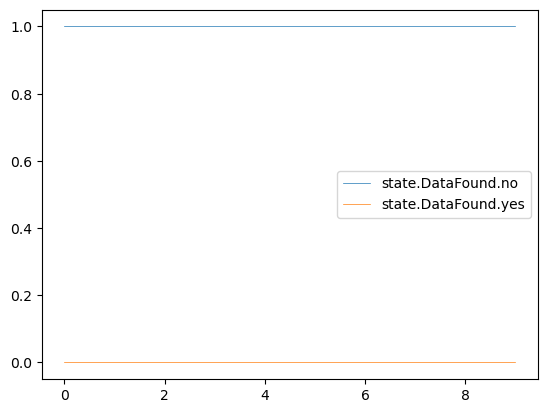

,agent_i.DataFound.no,agent_i.DataFound.yes,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,1.0,0.0,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,perms_change
1,1.0,0.0,EnumAccounts,Nop,denied,user_files,failure,active,none
2,1.0,0.0,Exit,Nop,denied,user_files,success,terminated,none
3,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none
4,1.0,0.0,Nop,Nop,denied,none,failure,terminated,none
5,1.0,0.0,Nop,Nop,auth,none,failure,terminated,none
6,1.0,0.0,Nop,Nop,auth,user_files,failure,terminated,none
7,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none
8,1.0,0.0,Nop,Nop,auth,none,success,terminated,none
9,1.0,0.0,Nop,Nop,auth,user_files,failure,terminated,none


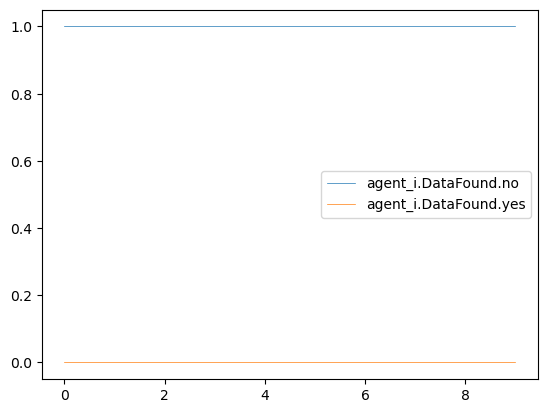

,agent_j.DataFound.no,agent_j.DataFound.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.000000,0.000000,RestrictAccPrivs,EnumAccounts,file_enum
1,0.440000,0.560000,Nop,EnumAccounts,file_write
2,0.462572,0.537428,Nop,Exit,file_enum
3,0.294218,0.705782,Nop,Nop,file_write
4,0.327507,0.672493,Nop,Nop,none
5,0.322014,0.677986,Nop,Nop,none
6,0.321987,0.678013,Nop,Nop,none
7,0.321987,0.678013,Nop,Nop,none
8,0.321987,0.678013,Nop,Nop,none
9,0.321987,0.678013,Nop,Nop,file_write


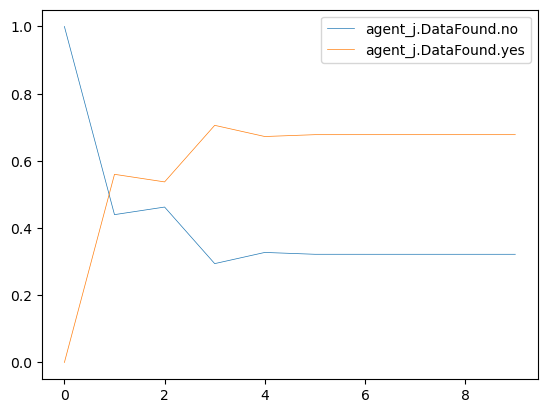

=============EscAccounts============


,state.EscAccounts.no,state.EscAccounts.yes,agent_i.action,agent_j.action
0,1.0,0.0,EnumAccounts,RestrictAccPrivs
1,1.0,0.0,EnumAccounts,Nop
2,1.0,0.0,Exit,Nop
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


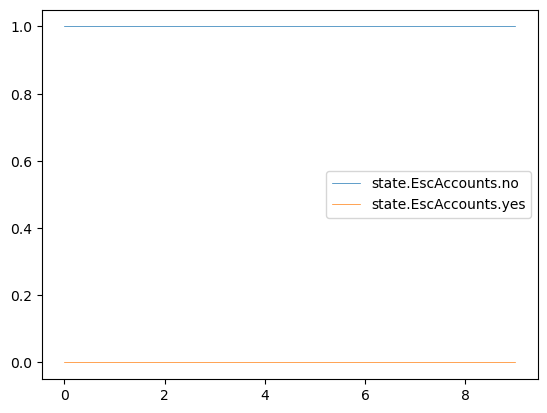

,agent_i.EscAccounts.no,agent_i.EscAccounts.yes,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.500000,0.500000,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,perms_change
1,0.761755,0.238244,EnumAccounts,Nop,denied,user_files,failure,active,none
2,0.935765,0.064235,Exit,Nop,denied,user_files,success,terminated,none
3,0.935765,0.064235,Nop,Nop,denied,user_files,failure,terminated,none
4,0.935765,0.064235,Nop,Nop,denied,none,failure,terminated,none
5,0.935765,0.064235,Nop,Nop,auth,none,failure,terminated,none
6,0.935765,0.064235,Nop,Nop,auth,user_files,failure,terminated,none
7,0.935765,0.064235,Nop,Nop,denied,user_files,failure,terminated,none
8,0.935765,0.064235,Nop,Nop,auth,none,success,terminated,none
9,0.935765,0.064235,Nop,Nop,auth,user_files,failure,terminated,none


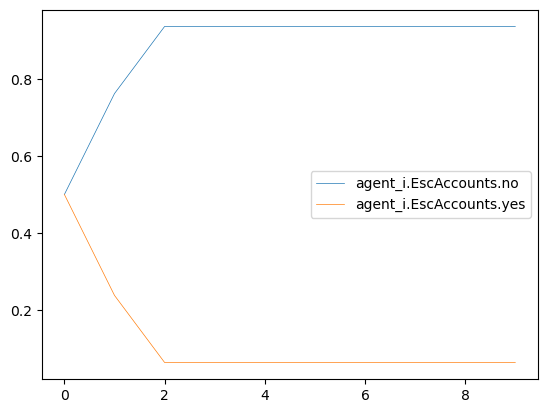

,agent_j.EscAccounts.no,agent_j.EscAccounts.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,RestrictAccPrivs,EnumAccounts,file_enum
1,1.0,0.0,Nop,EnumAccounts,file_write
2,1.0,0.0,Nop,Exit,file_enum
3,1.0,0.0,Nop,Nop,file_write
4,1.0,0.0,Nop,Nop,none
5,1.0,0.0,Nop,Nop,none
6,1.0,0.0,Nop,Nop,none
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,none
9,1.0,0.0,Nop,Nop,file_write


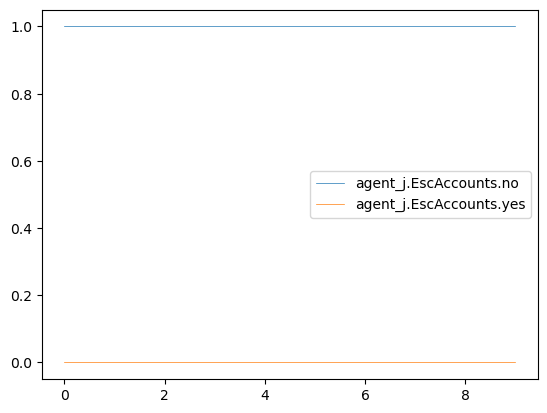

=============AccFound============


,state.AccFound.no,state.AccFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,EnumAccounts,RestrictAccPrivs
1,1.0,0.0,EnumAccounts,Nop
2,1.0,0.0,Exit,Nop
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


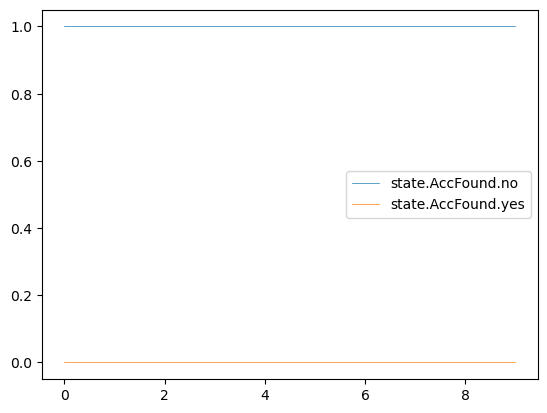

,agent_i.AccFound.no,agent_i.AccFound.yes,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,1.000000,0.000000,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,perms_change
1,0.931034,0.068966,EnumAccounts,Nop,denied,user_files,failure,active,none
2,0.973819,0.026181,Exit,Nop,denied,user_files,success,terminated,none
3,0.973819,0.026181,Nop,Nop,denied,user_files,failure,terminated,none
4,0.973819,0.026181,Nop,Nop,denied,none,failure,terminated,none
5,0.973819,0.026181,Nop,Nop,auth,none,failure,terminated,none
6,0.973819,0.026181,Nop,Nop,auth,user_files,failure,terminated,none
7,0.973819,0.026181,Nop,Nop,denied,user_files,failure,terminated,none
8,0.973819,0.026181,Nop,Nop,auth,none,success,terminated,none
9,0.973819,0.026181,Nop,Nop,auth,user_files,failure,terminated,none


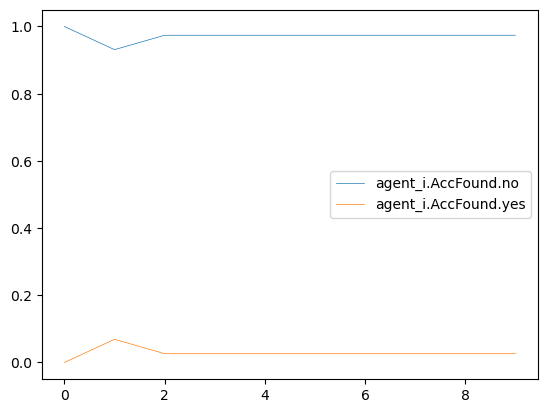

,agent_j.AccFound.no,agent_j.AccFound.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,RestrictAccPrivs,EnumAccounts,file_enum
1,1.0,0.0,Nop,EnumAccounts,file_write
2,1.0,0.0,Nop,Exit,file_enum
3,1.0,0.0,Nop,Nop,file_write
4,1.0,0.0,Nop,Nop,none
5,1.0,0.0,Nop,Nop,none
6,1.0,0.0,Nop,Nop,none
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,none
9,1.0,0.0,Nop,Nop,file_write


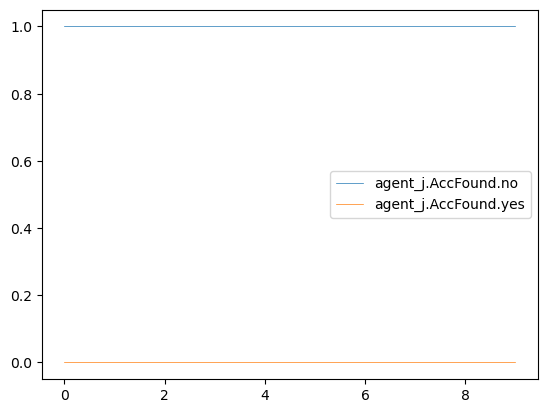

=============HostType============


,state.HostType.critical,state.HostType.critical_honeypot,state.HostType.honeypot,agent_i.action,agent_j.action
0,0.0,0.0,1.0,EnumAccounts,RestrictAccPrivs
1,0.0,0.0,1.0,EnumAccounts,Nop
2,0.0,0.0,1.0,Exit,Nop
3,0.0,0.0,1.0,Nop,Nop
4,0.0,0.0,1.0,Nop,Nop
5,0.0,0.0,1.0,Nop,Nop
6,0.0,0.0,1.0,Nop,Nop
7,0.0,0.0,1.0,Nop,Nop
8,0.0,0.0,1.0,Nop,Nop
9,0.0,0.0,1.0,Nop,Nop


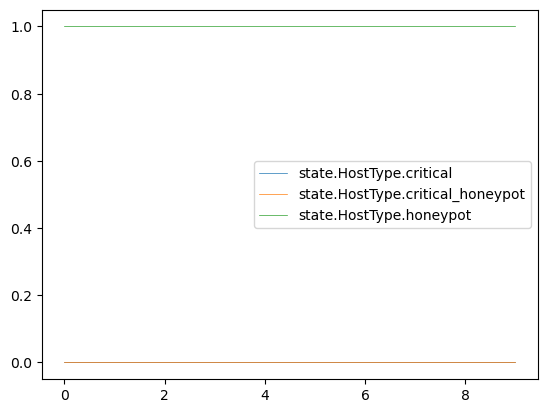

,agent_i.HostType.critical,agent_i.HostType.critical_honeypot,agent_i.HostType.honeypot,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.0,1.0,0.0,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,perms_change
1,0.0,1.0,0.0,EnumAccounts,Nop,denied,user_files,failure,active,none
2,0.0,1.0,0.0,Exit,Nop,denied,user_files,success,terminated,none
3,0.0,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none
4,0.0,1.0,0.0,Nop,Nop,denied,none,failure,terminated,none
5,0.0,1.0,0.0,Nop,Nop,auth,none,failure,terminated,none
6,0.0,1.0,0.0,Nop,Nop,auth,user_files,failure,terminated,none
7,0.0,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none
8,0.0,1.0,0.0,Nop,Nop,auth,none,success,terminated,none
9,0.0,1.0,0.0,Nop,Nop,auth,user_files,failure,terminated,none


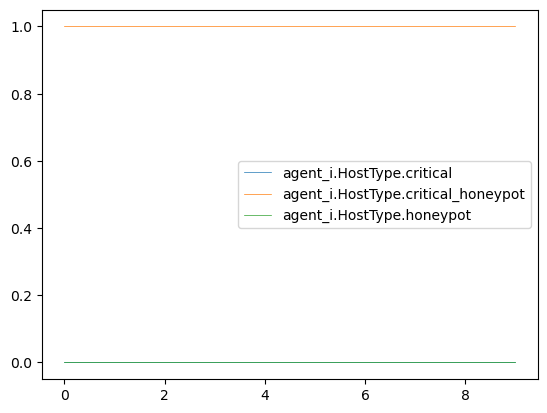

,agent_j.HostType.critical,agent_j.HostType.critical_honeypot,agent_j.HostType.honeypot,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,0.0,1.0,RestrictAccPrivs,EnumAccounts,file_enum
1,0.0,0.0,1.0,Nop,EnumAccounts,file_write
2,0.0,0.0,1.0,Nop,Exit,file_enum
3,0.0,0.0,1.0,Nop,Nop,file_write
4,0.0,0.0,1.0,Nop,Nop,none
5,0.0,0.0,1.0,Nop,Nop,none
6,0.0,0.0,1.0,Nop,Nop,none
7,0.0,0.0,1.0,Nop,Nop,none
8,0.0,0.0,1.0,Nop,Nop,none
9,0.0,0.0,1.0,Nop,Nop,file_write


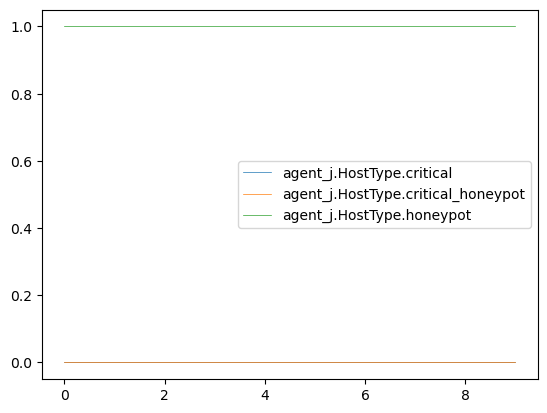

=============AttActive============


,state.AttActive.no,state.AttActive.yes,agent_i.action,agent_j.action
0,0.0,1.0,EnumAccounts,RestrictAccPrivs
1,0.0,1.0,EnumAccounts,Nop
2,1.0,0.0,Exit,Nop
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


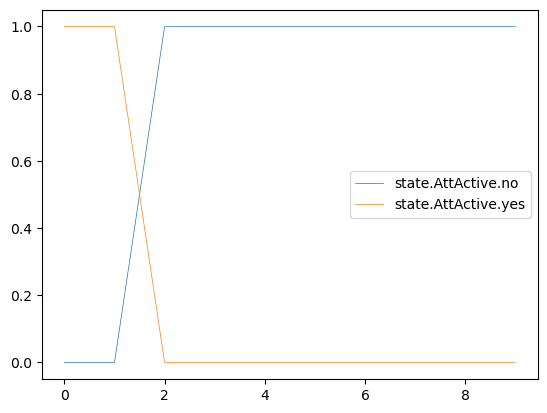

,agent_i.AttActive.no,agent_i.AttActive.yes,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.0,1.0,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,perms_change
1,0.0,1.0,EnumAccounts,Nop,denied,user_files,failure,active,none
2,0.0,1.0,Exit,Nop,denied,user_files,success,terminated,none
3,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none
4,1.0,0.0,Nop,Nop,denied,none,failure,terminated,none
5,1.0,0.0,Nop,Nop,auth,none,failure,terminated,none
6,1.0,0.0,Nop,Nop,auth,user_files,failure,terminated,none
7,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none
8,1.0,0.0,Nop,Nop,auth,none,success,terminated,none
9,1.0,0.0,Nop,Nop,auth,user_files,failure,terminated,none


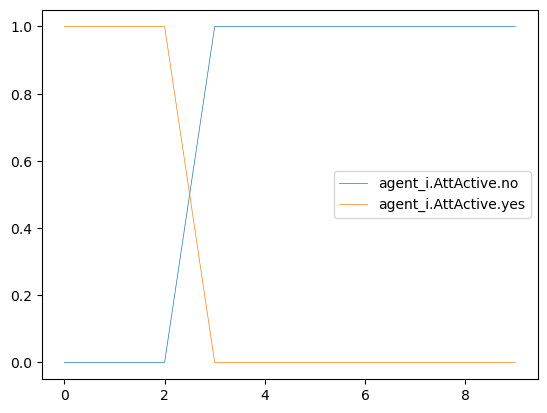

,agent_j.AttActive.no,agent_j.AttActive.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.500000,0.500000,RestrictAccPrivs,EnumAccounts,file_enum
1,0.200000,0.800000,Nop,EnumAccounts,file_write
2,0.191939,0.808061,Nop,Exit,file_enum
3,0.039390,0.960610,Nop,Nop,file_write
4,0.848878,0.151122,Nop,Nop,none
5,0.979722,0.020278,Nop,Nop,none
6,0.981076,0.018924,Nop,Nop,none
7,0.981082,0.018918,Nop,Nop,none
8,0.981082,0.018918,Nop,Nop,none
9,0.981082,0.018918,Nop,Nop,file_write


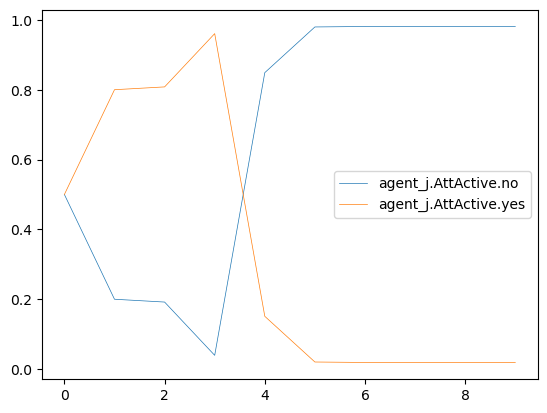

=============DataInjected============


,state.DataInjected.no,state.DataInjected.yes,agent_i.action,agent_j.action
0,1.0,0.0,EnumAccounts,RestrictAccPrivs
1,1.0,0.0,EnumAccounts,Nop
2,1.0,0.0,Exit,Nop
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


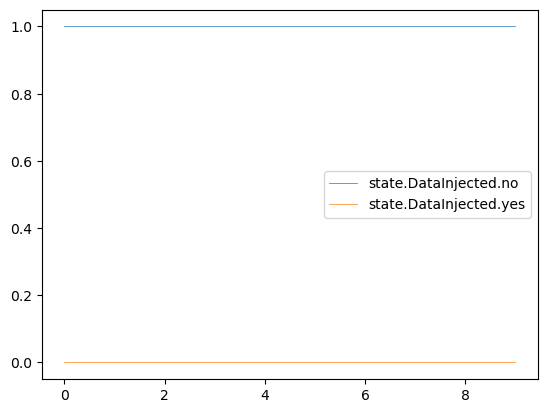

,agent_i.DataInjected.no,agent_i.DataInjected.yes,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,1.0,0.0,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,perms_change
1,1.0,0.0,EnumAccounts,Nop,denied,user_files,failure,active,none
2,1.0,0.0,Exit,Nop,denied,user_files,success,terminated,none
3,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none
4,1.0,0.0,Nop,Nop,denied,none,failure,terminated,none
5,1.0,0.0,Nop,Nop,auth,none,failure,terminated,none
6,1.0,0.0,Nop,Nop,auth,user_files,failure,terminated,none
7,1.0,0.0,Nop,Nop,denied,user_files,failure,terminated,none
8,1.0,0.0,Nop,Nop,auth,none,success,terminated,none
9,1.0,0.0,Nop,Nop,auth,user_files,failure,terminated,none


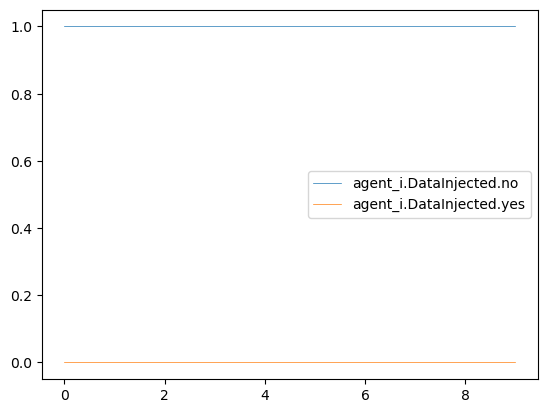

,agent_j.DataInjected.no,agent_j.DataInjected.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,RestrictAccPrivs,EnumAccounts,file_enum
1,1.0,0.0,Nop,EnumAccounts,file_write
2,1.0,0.0,Nop,Exit,file_enum
3,1.0,0.0,Nop,Nop,file_write
4,1.0,0.0,Nop,Nop,none
5,1.0,0.0,Nop,Nop,none
6,1.0,0.0,Nop,Nop,none
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,none
9,1.0,0.0,Nop,Nop,file_write


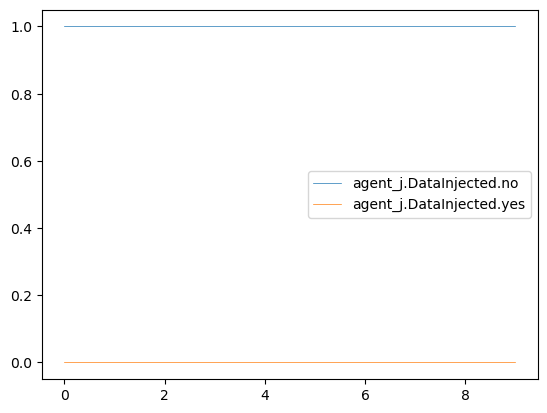

=============AccessLevel============


,state.AccessLevel.root,state.AccessLevel.user,agent_i.action,agent_j.action
0,0.0,1.0,EnumAccounts,RestrictAccPrivs
1,0.0,1.0,EnumAccounts,Nop
2,0.0,1.0,Exit,Nop
3,0.0,1.0,Nop,Nop
4,0.0,1.0,Nop,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


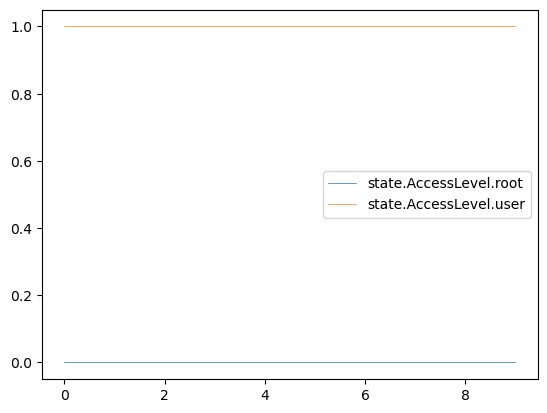

,agent_i.AccessLevel.root,agent_i.AccessLevel.user,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.0,1.0,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,perms_change
1,0.0,1.0,EnumAccounts,Nop,denied,user_files,failure,active,none
2,0.0,1.0,Exit,Nop,denied,user_files,success,terminated,none
3,0.0,1.0,Nop,Nop,denied,user_files,failure,terminated,none
4,0.0,1.0,Nop,Nop,denied,none,failure,terminated,none
5,0.0,1.0,Nop,Nop,auth,none,failure,terminated,none
6,0.0,1.0,Nop,Nop,auth,user_files,failure,terminated,none
7,0.0,1.0,Nop,Nop,denied,user_files,failure,terminated,none
8,0.0,1.0,Nop,Nop,auth,none,success,terminated,none
9,0.0,1.0,Nop,Nop,auth,user_files,failure,terminated,none


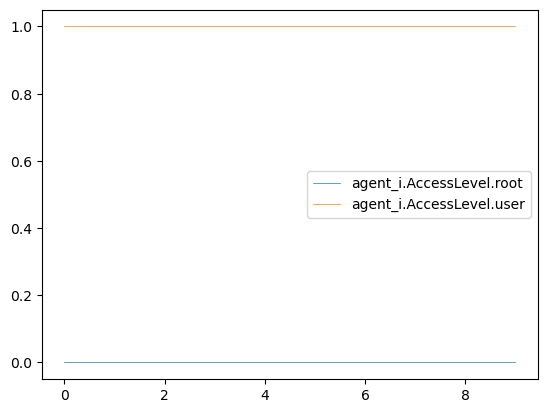

,agent_j.AccessLevel.root,agent_j.AccessLevel.user,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,1.0,RestrictAccPrivs,EnumAccounts,file_enum
1,0.0,1.0,Nop,EnumAccounts,file_write
2,0.0,1.0,Nop,Exit,file_enum
3,0.0,1.0,Nop,Nop,file_write
4,0.0,1.0,Nop,Nop,none
5,0.0,1.0,Nop,Nop,none
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,file_write


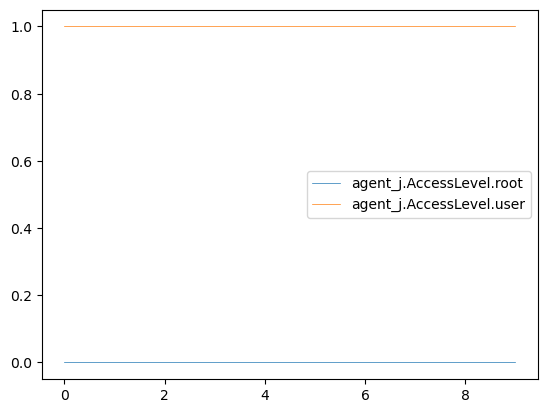

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


,agent_i.thetaj.DefFrame.highCap,agent_i.thetaj.DefFrame.lowCap,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.500000,0.500000,denied,user_files,failure,active,perms_change
1,0.345455,0.654545,denied,user_files,failure,active,acc_policy_change
2,0.337431,0.662569,auth,none,success,terminated,none
3,0.337431,0.662569,auth,none,failure,terminated,none
4,0.337431,0.662569,auth,user_files,failure,terminated,none
5,0.337431,0.662569,auth,none,failure,terminated,none
6,0.337431,0.662569,denied,none,failure,terminated,none
7,0.337431,0.662569,auth,user_files,success,terminated,none
8,0.337431,0.662569,auth,none,success,terminated,none
9,0.337431,0.662569,auth,user_files,success,terminated,none


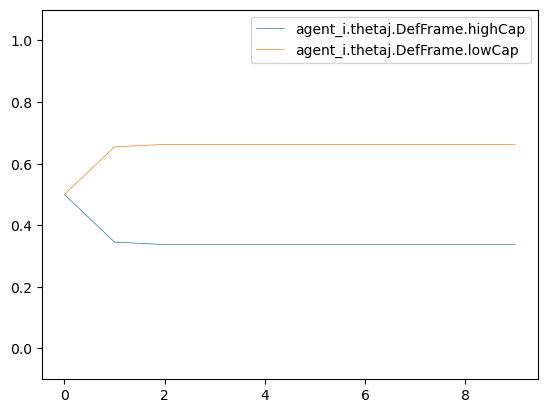

,agent_j.thetaj.AttackerFrame.att,agent_j.observation.EndPtAlerts'
0,1.0,file_enum
1,1.0,none
2,1.0,file_enum
3,1.0,none
4,1.0,file_enum
5,1.0,none
6,1.0,file_write
7,1.0,none
8,1.0,login_activity
9,1.0,none


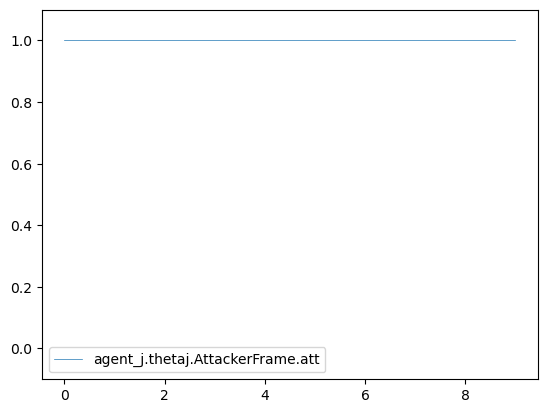

=============HostHasData============


,state.HostHasData.no,state.HostHasData.yes,agent_i.action,agent_j.action
0,0.0,1.0,EnumAccounts,RestrictAccPrivs
1,0.0,1.0,EnumAccounts,Nop
2,0.0,1.0,Exit,Nop
3,0.0,1.0,Nop,Nop
4,0.0,1.0,Nop,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


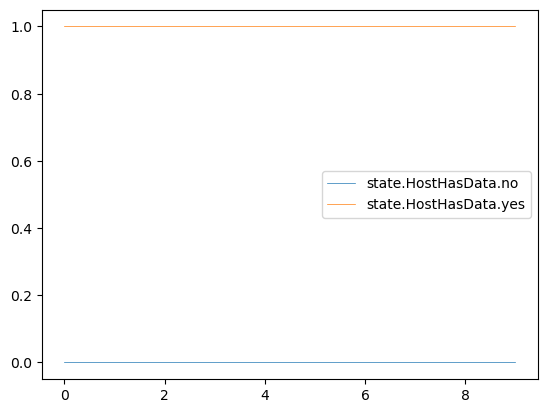

,agent_i.HostHasData.no,agent_i.HostHasData.yes,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.5,0.5,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,perms_change
1,0.5,0.5,EnumAccounts,Nop,denied,user_files,failure,active,acc_policy_change
2,0.5,0.5,Exit,Nop,auth,none,success,terminated,none
3,0.5,0.5,Nop,Nop,auth,none,failure,terminated,none
4,0.5,0.5,Nop,Nop,auth,user_files,failure,terminated,none
5,0.5,0.5,Nop,Nop,auth,none,failure,terminated,none
6,0.5,0.5,Nop,Nop,denied,none,failure,terminated,none
7,0.5,0.5,Nop,Nop,auth,user_files,success,terminated,none
8,0.5,0.5,Nop,Nop,auth,none,success,terminated,none
9,0.5,0.5,Nop,Nop,auth,user_files,success,terminated,none


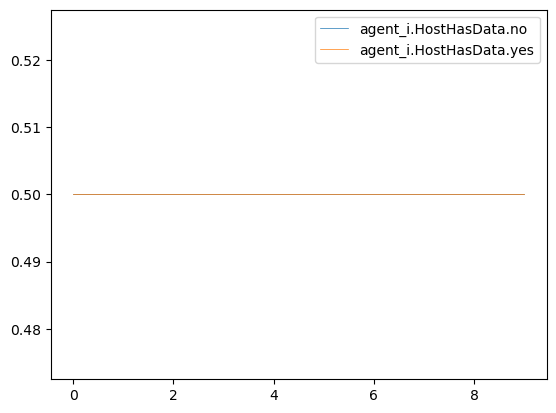

,agent_j.HostHasData.no,agent_j.HostHasData.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,1.0,RestrictAccPrivs,EnumAccounts,file_enum
1,0.0,1.0,Nop,EnumAccounts,none
2,0.0,1.0,Nop,Exit,file_enum
3,0.0,1.0,Nop,Nop,none
4,0.0,1.0,Nop,Nop,file_enum
5,0.0,1.0,Nop,Nop,none
6,0.0,1.0,Nop,Nop,file_write
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,login_activity
9,0.0,1.0,Nop,Nop,none


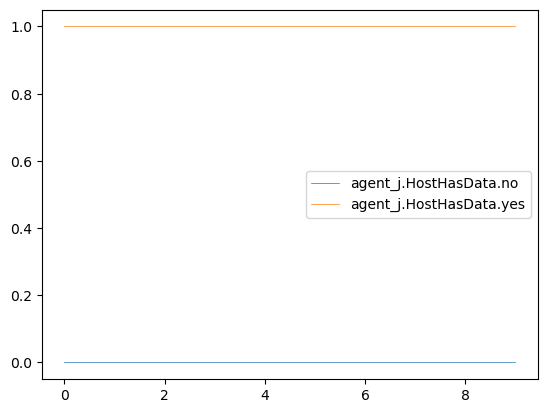

=============DataPrivs============


,state.DataPrivs.root,state.DataPrivs.user,agent_i.action,agent_j.action
0,1.0,0.0,EnumAccounts,RestrictAccPrivs
1,1.0,0.0,EnumAccounts,Nop
2,1.0,0.0,Exit,Nop
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


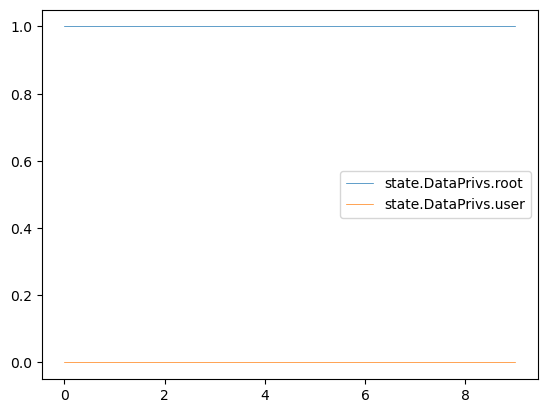

,agent_i.DataPrivs.root,agent_i.DataPrivs.user,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.500000,0.500000,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,perms_change
1,0.990909,0.009091,EnumAccounts,Nop,denied,user_files,failure,active,acc_policy_change
2,0.999693,0.000307,Exit,Nop,auth,none,success,terminated,none
3,0.999693,0.000307,Nop,Nop,auth,none,failure,terminated,none
4,0.999693,0.000307,Nop,Nop,auth,user_files,failure,terminated,none
5,0.999693,0.000307,Nop,Nop,auth,none,failure,terminated,none
6,0.999693,0.000307,Nop,Nop,denied,none,failure,terminated,none
7,0.999693,0.000307,Nop,Nop,auth,user_files,success,terminated,none
8,0.999693,0.000307,Nop,Nop,auth,none,success,terminated,none
9,0.999693,0.000307,Nop,Nop,auth,user_files,success,terminated,none


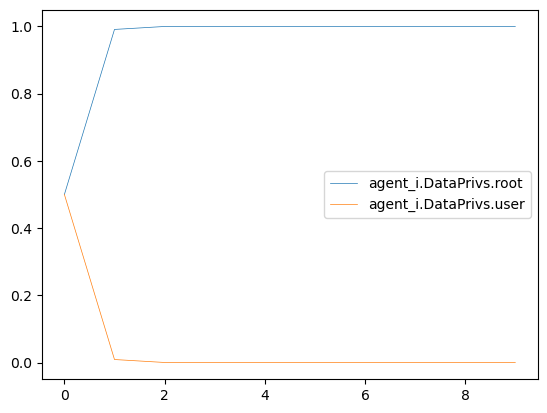

,agent_j.DataPrivs.root,agent_j.DataPrivs.user,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,1.0,RestrictAccPrivs,EnumAccounts,file_enum
1,1.0,0.0,Nop,EnumAccounts,none
2,1.0,0.0,Nop,Exit,file_enum
3,1.0,0.0,Nop,Nop,none
4,1.0,0.0,Nop,Nop,file_enum
5,1.0,0.0,Nop,Nop,none
6,1.0,0.0,Nop,Nop,file_write
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,login_activity
9,1.0,0.0,Nop,Nop,none


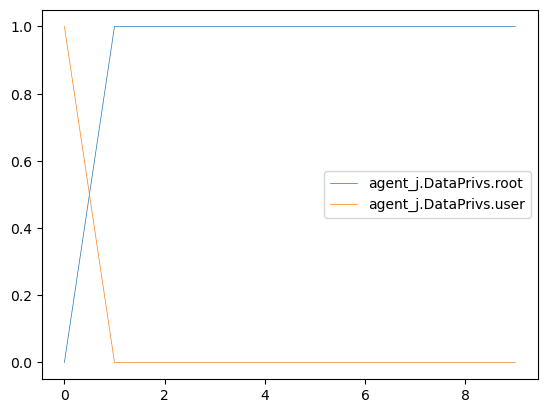

=============DataFound============


,state.DataFound.no,state.DataFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,EnumAccounts,RestrictAccPrivs
1,1.0,0.0,EnumAccounts,Nop
2,1.0,0.0,Exit,Nop
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


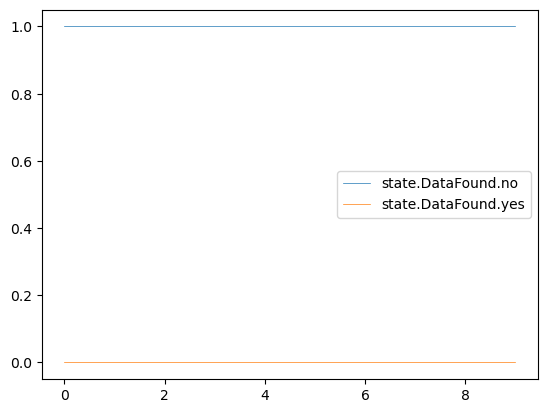

,agent_i.DataFound.no,agent_i.DataFound.yes,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,1.0,0.0,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,perms_change
1,1.0,0.0,EnumAccounts,Nop,denied,user_files,failure,active,acc_policy_change
2,1.0,0.0,Exit,Nop,auth,none,success,terminated,none
3,1.0,0.0,Nop,Nop,auth,none,failure,terminated,none
4,1.0,0.0,Nop,Nop,auth,user_files,failure,terminated,none
5,1.0,0.0,Nop,Nop,auth,none,failure,terminated,none
6,1.0,0.0,Nop,Nop,denied,none,failure,terminated,none
7,1.0,0.0,Nop,Nop,auth,user_files,success,terminated,none
8,1.0,0.0,Nop,Nop,auth,none,success,terminated,none
9,1.0,0.0,Nop,Nop,auth,user_files,success,terminated,none


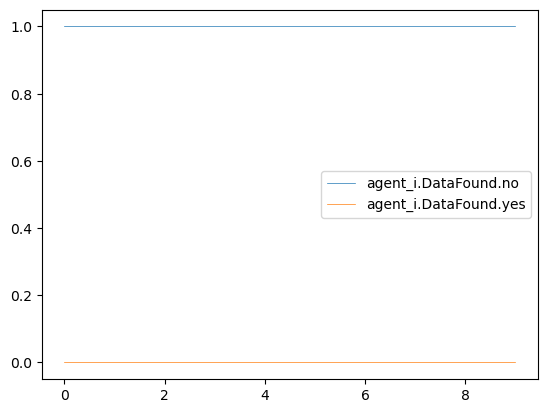

,agent_j.DataFound.no,agent_j.DataFound.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.000000,0.000000,RestrictAccPrivs,EnumAccounts,file_enum
1,0.440000,0.560000,Nop,EnumAccounts,none
2,0.800000,0.200000,Nop,Exit,file_enum
3,0.455665,0.544335,Nop,Nop,none
4,0.451519,0.548481,Nop,Nop,file_enum
5,0.451875,0.548125,Nop,Nop,none
6,0.451858,0.548142,Nop,Nop,file_write
7,0.451858,0.548142,Nop,Nop,none
8,0.451858,0.548142,Nop,Nop,login_activity
9,0.451858,0.548142,Nop,Nop,none


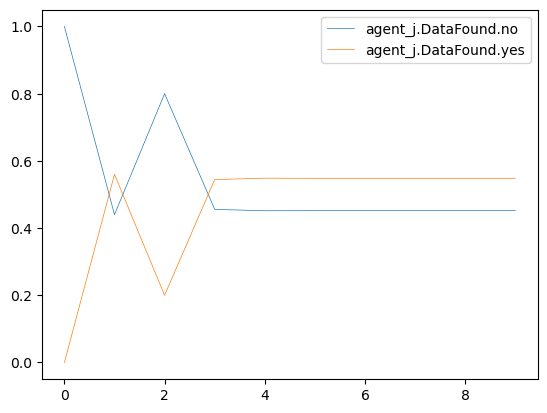

=============EscAccounts============


,state.EscAccounts.no,state.EscAccounts.yes,agent_i.action,agent_j.action
0,1.0,0.0,EnumAccounts,RestrictAccPrivs
1,1.0,0.0,EnumAccounts,Nop
2,1.0,0.0,Exit,Nop
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


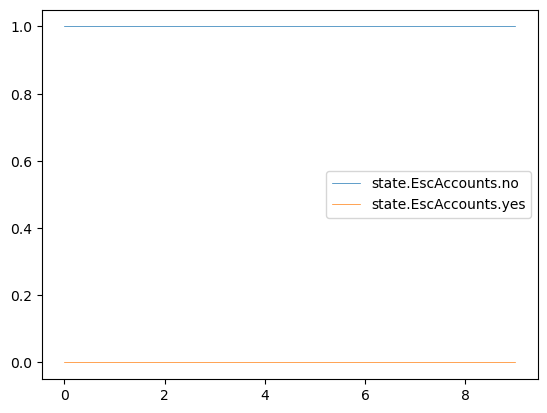

,agent_i.EscAccounts.no,agent_i.EscAccounts.yes,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.500000,0.500000,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,perms_change
1,0.761755,0.238244,EnumAccounts,Nop,denied,user_files,failure,active,acc_policy_change
2,0.930876,0.069124,Exit,Nop,auth,none,success,terminated,none
3,0.930876,0.069124,Nop,Nop,auth,none,failure,terminated,none
4,0.930876,0.069124,Nop,Nop,auth,user_files,failure,terminated,none
5,0.930876,0.069124,Nop,Nop,auth,none,failure,terminated,none
6,0.930876,0.069124,Nop,Nop,denied,none,failure,terminated,none
7,0.930876,0.069124,Nop,Nop,auth,user_files,success,terminated,none
8,0.930876,0.069124,Nop,Nop,auth,none,success,terminated,none
9,0.930876,0.069124,Nop,Nop,auth,user_files,success,terminated,none


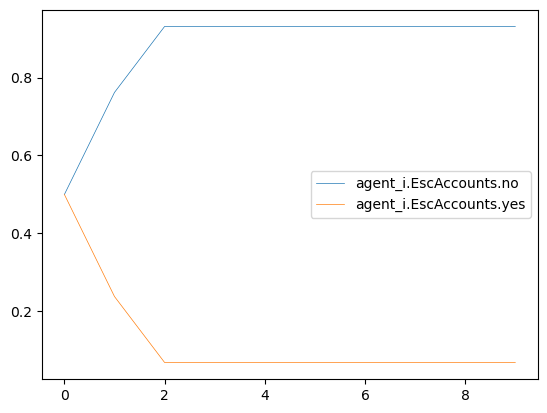

,agent_j.EscAccounts.no,agent_j.EscAccounts.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,RestrictAccPrivs,EnumAccounts,file_enum
1,1.0,0.0,Nop,EnumAccounts,none
2,1.0,0.0,Nop,Exit,file_enum
3,1.0,0.0,Nop,Nop,none
4,1.0,0.0,Nop,Nop,file_enum
5,1.0,0.0,Nop,Nop,none
6,1.0,0.0,Nop,Nop,file_write
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,login_activity
9,1.0,0.0,Nop,Nop,none


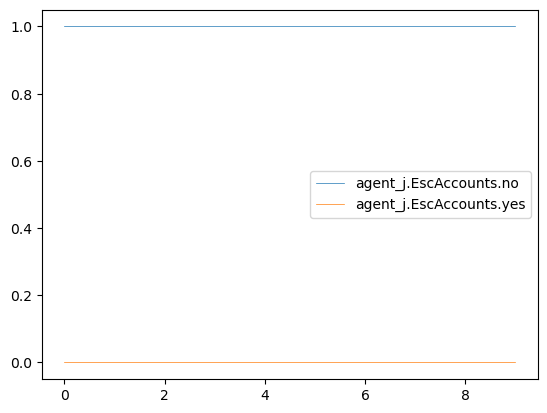

=============AccFound============


,state.AccFound.no,state.AccFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,EnumAccounts,RestrictAccPrivs
1,1.0,0.0,EnumAccounts,Nop
2,1.0,0.0,Exit,Nop
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


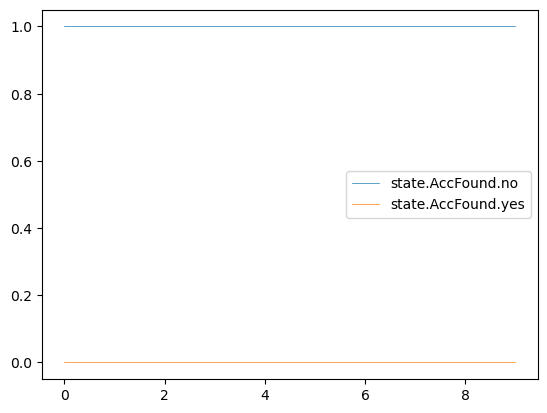

,agent_i.AccFound.no,agent_i.AccFound.yes,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,1.000000,0.000000,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,perms_change
1,0.931034,0.068966,EnumAccounts,Nop,denied,user_files,failure,active,acc_policy_change
2,0.972248,0.027752,Exit,Nop,auth,none,success,terminated,none
3,0.972248,0.027752,Nop,Nop,auth,none,failure,terminated,none
4,0.972248,0.027752,Nop,Nop,auth,user_files,failure,terminated,none
5,0.972248,0.027752,Nop,Nop,auth,none,failure,terminated,none
6,0.972248,0.027752,Nop,Nop,denied,none,failure,terminated,none
7,0.972248,0.027752,Nop,Nop,auth,user_files,success,terminated,none
8,0.972248,0.027752,Nop,Nop,auth,none,success,terminated,none
9,0.972248,0.027752,Nop,Nop,auth,user_files,success,terminated,none


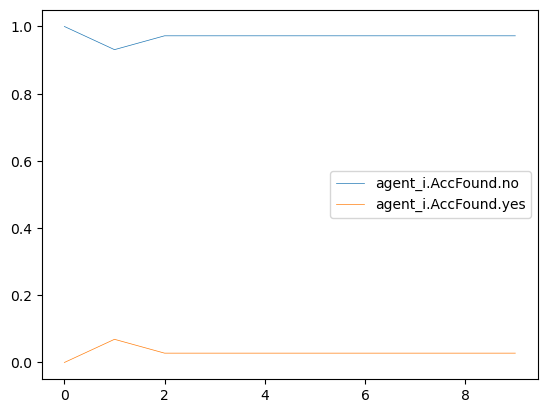

,agent_j.AccFound.no,agent_j.AccFound.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,RestrictAccPrivs,EnumAccounts,file_enum
1,1.0,0.0,Nop,EnumAccounts,none
2,1.0,0.0,Nop,Exit,file_enum
3,1.0,0.0,Nop,Nop,none
4,1.0,0.0,Nop,Nop,file_enum
5,1.0,0.0,Nop,Nop,none
6,1.0,0.0,Nop,Nop,file_write
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,login_activity
9,1.0,0.0,Nop,Nop,none


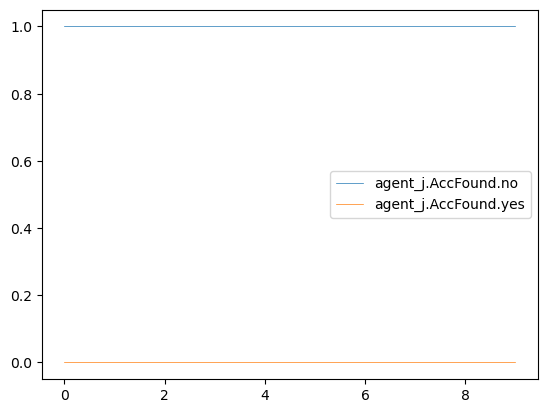

=============HostType============


,state.HostType.critical,state.HostType.critical_honeypot,state.HostType.honeypot,agent_i.action,agent_j.action
0,0.0,0.0,1.0,EnumAccounts,RestrictAccPrivs
1,0.0,0.0,1.0,EnumAccounts,Nop
2,0.0,0.0,1.0,Exit,Nop
3,0.0,0.0,1.0,Nop,Nop
4,0.0,0.0,1.0,Nop,Nop
5,0.0,0.0,1.0,Nop,Nop
6,0.0,0.0,1.0,Nop,Nop
7,0.0,0.0,1.0,Nop,Nop
8,0.0,0.0,1.0,Nop,Nop
9,0.0,0.0,1.0,Nop,Nop


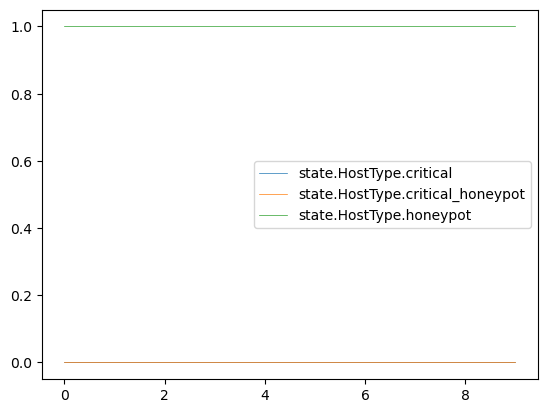

,agent_i.HostType.critical,agent_i.HostType.critical_honeypot,agent_i.HostType.honeypot,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.0,1.0,0.0,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,perms_change
1,0.0,1.0,0.0,EnumAccounts,Nop,denied,user_files,failure,active,acc_policy_change
2,0.0,1.0,0.0,Exit,Nop,auth,none,success,terminated,none
3,0.0,1.0,0.0,Nop,Nop,auth,none,failure,terminated,none
4,0.0,1.0,0.0,Nop,Nop,auth,user_files,failure,terminated,none
5,0.0,1.0,0.0,Nop,Nop,auth,none,failure,terminated,none
6,0.0,1.0,0.0,Nop,Nop,denied,none,failure,terminated,none
7,0.0,1.0,0.0,Nop,Nop,auth,user_files,success,terminated,none
8,0.0,1.0,0.0,Nop,Nop,auth,none,success,terminated,none
9,0.0,1.0,0.0,Nop,Nop,auth,user_files,success,terminated,none


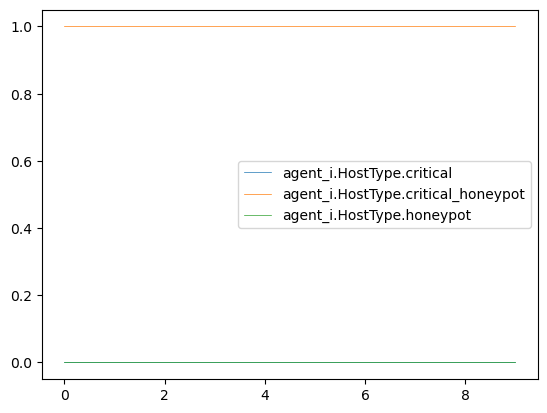

,agent_j.HostType.critical,agent_j.HostType.critical_honeypot,agent_j.HostType.honeypot,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,0.0,1.0,RestrictAccPrivs,EnumAccounts,file_enum
1,0.0,0.0,1.0,Nop,EnumAccounts,none
2,0.0,0.0,1.0,Nop,Exit,file_enum
3,0.0,0.0,1.0,Nop,Nop,none
4,0.0,0.0,1.0,Nop,Nop,file_enum
5,0.0,0.0,1.0,Nop,Nop,none
6,0.0,0.0,1.0,Nop,Nop,file_write
7,0.0,0.0,1.0,Nop,Nop,none
8,0.0,0.0,1.0,Nop,Nop,login_activity
9,0.0,0.0,1.0,Nop,Nop,none


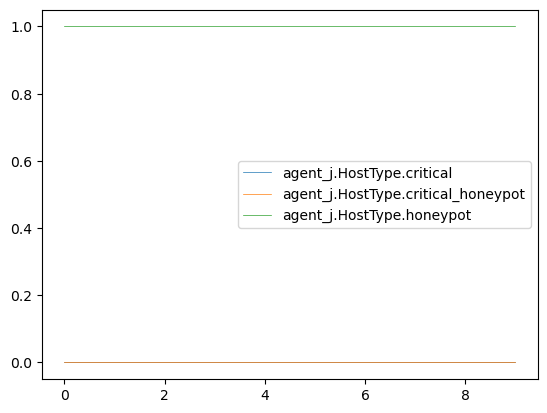

=============AttActive============


,state.AttActive.no,state.AttActive.yes,agent_i.action,agent_j.action
0,0.0,1.0,EnumAccounts,RestrictAccPrivs
1,0.0,1.0,EnumAccounts,Nop
2,1.0,0.0,Exit,Nop
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


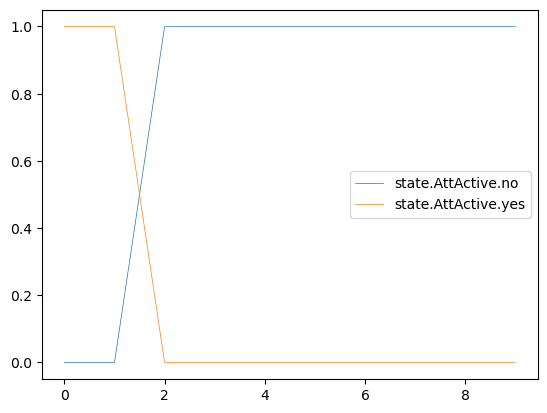

,agent_i.AttActive.no,agent_i.AttActive.yes,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.0,1.0,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,perms_change
1,0.0,1.0,EnumAccounts,Nop,denied,user_files,failure,active,acc_policy_change
2,0.0,1.0,Exit,Nop,auth,none,success,terminated,none
3,1.0,0.0,Nop,Nop,auth,none,failure,terminated,none
4,1.0,0.0,Nop,Nop,auth,user_files,failure,terminated,none
5,1.0,0.0,Nop,Nop,auth,none,failure,terminated,none
6,1.0,0.0,Nop,Nop,denied,none,failure,terminated,none
7,1.0,0.0,Nop,Nop,auth,user_files,success,terminated,none
8,1.0,0.0,Nop,Nop,auth,none,success,terminated,none
9,1.0,0.0,Nop,Nop,auth,user_files,success,terminated,none


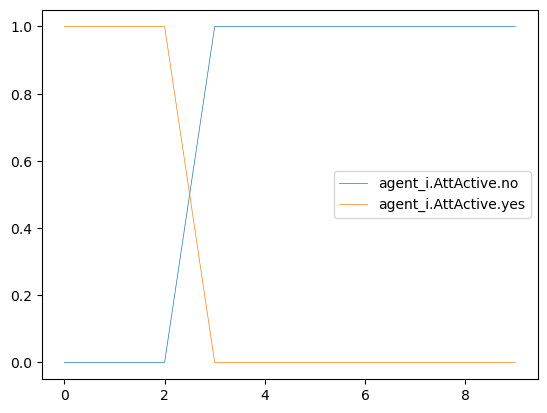

,agent_j.AttActive.no,agent_j.AttActive.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.500000,0.500000,RestrictAccPrivs,EnumAccounts,file_enum
1,0.200000,0.800000,Nop,EnumAccounts,none
2,0.500000,0.500000,Nop,Exit,file_enum
3,0.212631,0.787369,Nop,Nop,none
4,0.887871,0.112129,Nop,Nop,file_enum
5,0.890668,0.109332,Nop,Nop,none
6,0.891482,0.108518,Nop,Nop,file_write
7,0.891488,0.108512,Nop,Nop,none
8,0.891488,0.108512,Nop,Nop,login_activity
9,0.891488,0.108512,Nop,Nop,none


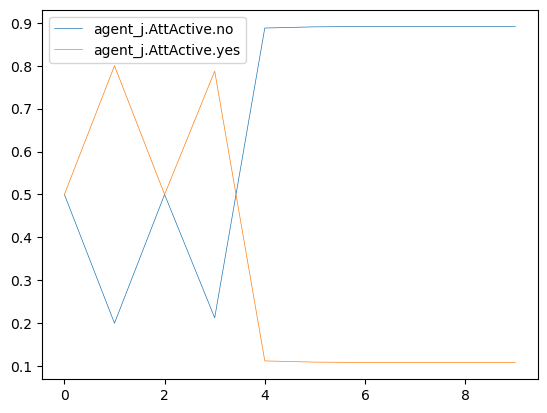

=============DataInjected============


,state.DataInjected.no,state.DataInjected.yes,agent_i.action,agent_j.action
0,1.0,0.0,EnumAccounts,RestrictAccPrivs
1,1.0,0.0,EnumAccounts,Nop
2,1.0,0.0,Exit,Nop
3,1.0,0.0,Nop,Nop
4,1.0,0.0,Nop,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


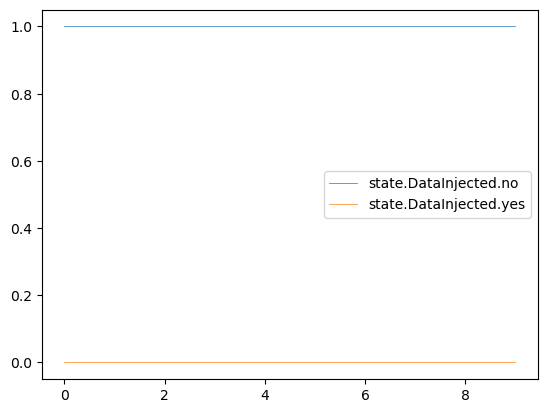

,agent_i.DataInjected.no,agent_i.DataInjected.yes,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,1.0,0.0,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,perms_change
1,1.0,0.0,EnumAccounts,Nop,denied,user_files,failure,active,acc_policy_change
2,1.0,0.0,Exit,Nop,auth,none,success,terminated,none
3,1.0,0.0,Nop,Nop,auth,none,failure,terminated,none
4,1.0,0.0,Nop,Nop,auth,user_files,failure,terminated,none
5,1.0,0.0,Nop,Nop,auth,none,failure,terminated,none
6,1.0,0.0,Nop,Nop,denied,none,failure,terminated,none
7,1.0,0.0,Nop,Nop,auth,user_files,success,terminated,none
8,1.0,0.0,Nop,Nop,auth,none,success,terminated,none
9,1.0,0.0,Nop,Nop,auth,user_files,success,terminated,none


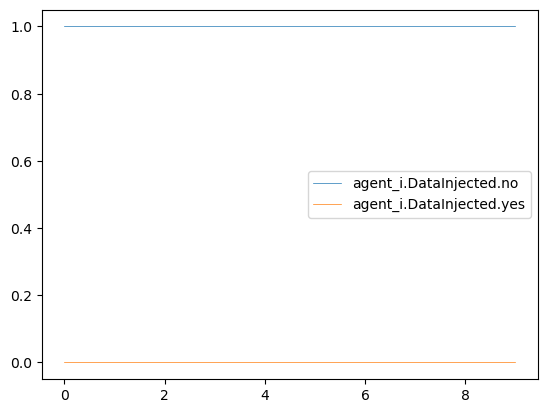

,agent_j.DataInjected.no,agent_j.DataInjected.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,RestrictAccPrivs,EnumAccounts,file_enum
1,1.0,0.0,Nop,EnumAccounts,none
2,1.0,0.0,Nop,Exit,file_enum
3,1.0,0.0,Nop,Nop,none
4,1.0,0.0,Nop,Nop,file_enum
5,1.0,0.0,Nop,Nop,none
6,1.0,0.0,Nop,Nop,file_write
7,1.0,0.0,Nop,Nop,none
8,1.0,0.0,Nop,Nop,login_activity
9,1.0,0.0,Nop,Nop,none


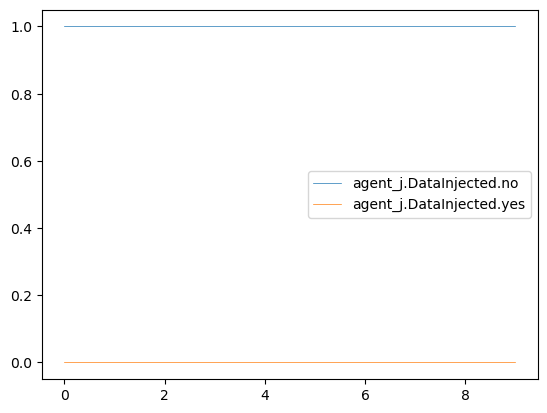

=============AccessLevel============


,state.AccessLevel.root,state.AccessLevel.user,agent_i.action,agent_j.action
0,0.0,1.0,EnumAccounts,RestrictAccPrivs
1,0.0,1.0,EnumAccounts,Nop
2,0.0,1.0,Exit,Nop
3,0.0,1.0,Nop,Nop
4,0.0,1.0,Nop,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


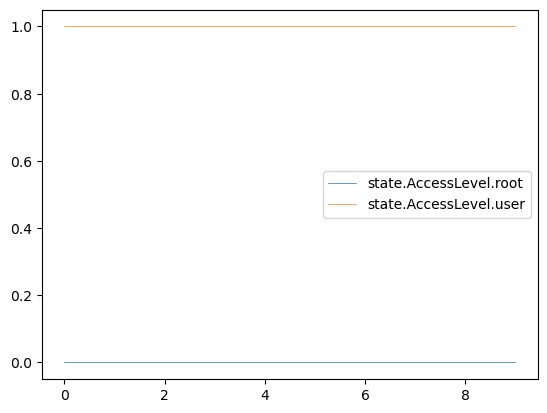

,agent_i.AccessLevel.root,agent_i.AccessLevel.user,agent_i.action,agent_j.action,agent_i.observation.AccessPerm',agent_i.observation.HostObs',agent_i.observation.ActionResult',agent_i.observation.ConnStatus',agent_i.observation.DefenseObs'
0,0.0,1.0,EnumAccounts,RestrictAccPrivs,denied,user_files,failure,active,perms_change
1,0.0,1.0,EnumAccounts,Nop,denied,user_files,failure,active,acc_policy_change
2,0.0,1.0,Exit,Nop,auth,none,success,terminated,none
3,0.0,1.0,Nop,Nop,auth,none,failure,terminated,none
4,0.0,1.0,Nop,Nop,auth,user_files,failure,terminated,none
5,0.0,1.0,Nop,Nop,auth,none,failure,terminated,none
6,0.0,1.0,Nop,Nop,denied,none,failure,terminated,none
7,0.0,1.0,Nop,Nop,auth,user_files,success,terminated,none
8,0.0,1.0,Nop,Nop,auth,none,success,terminated,none
9,0.0,1.0,Nop,Nop,auth,user_files,success,terminated,none


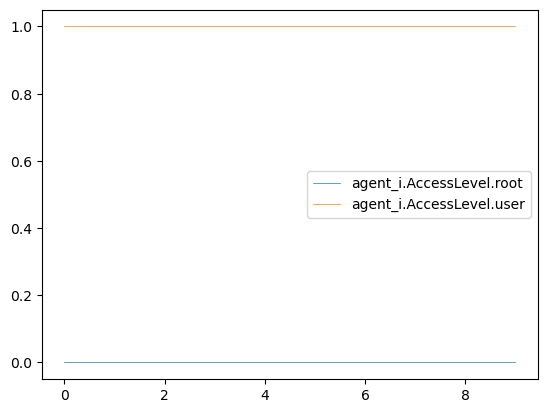

,agent_j.AccessLevel.root,agent_j.AccessLevel.user,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,1.0,RestrictAccPrivs,EnumAccounts,file_enum
1,0.0,1.0,Nop,EnumAccounts,none
2,0.0,1.0,Nop,Exit,file_enum
3,0.0,1.0,Nop,Nop,none
4,0.0,1.0,Nop,Nop,file_enum
5,0.0,1.0,Nop,Nop,none
6,0.0,1.0,Nop,Nop,file_write
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,login_activity
9,0.0,1.0,Nop,Nop,none


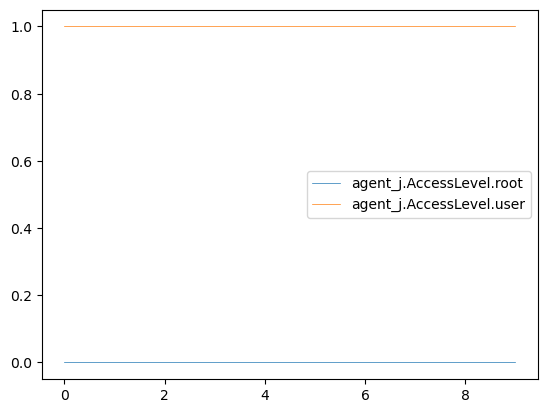

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)

    